In [5]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd
#import pandas.io.data as web

# plotting modules
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
import datetime as datetime
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [6]:
df = pd.read_excel('/Users/Adeel/Desktop/ECON628-01-omerqureshi84/datasets/main-data.xlsx')


In [7]:
df.shape

(117504, 18)

In [8]:
#Determining the type of data
df.dtypes

country          object
year              int64
month             int64
time             object
fine            float64
coarse          float64
code             object
country_name     object
inc_ind         float64
id               object
sample          float64
lerate          float64
idepi            object
irate_diffp     float64
lcpi            float64
lindprod        float64
riskprem        float64
Indicator        object
dtype: object

In [9]:
#Exploring data
df.index

RangeIndex(start=0, stop=117504, step=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117504 entries, 0 to 117503
Data columns (total 18 columns):
country         117504 non-null object
year            117504 non-null int64
month           117504 non-null int64
time            117504 non-null object
fine            77525 non-null float64
coarse          77524 non-null float64
code            112608 non-null object
country_name    117504 non-null object
inc_ind         113220 non-null float64
id              117504 non-null object
sample          21407 non-null float64
lerate          95043 non-null float64
idepi           117504 non-null object
irate_diffp     54384 non-null float64
lcpi            37951 non-null float64
lindprod        19156 non-null float64
riskprem        85056 non-null float64
Indicator       113220 non-null object
dtypes: float64(9), int64(2), object(7)
memory usage: 13.0+ MB


In [11]:
#These columns are not required in data analysis
df.drop(['id','sample','fine','coarse'
           ], axis=1, inplace=True)

In [12]:
#Converting the column values to two decimal places
df.lerate = df.lerate.round(2)
df.irate_diffp = df.irate_diffp.round(2)
df.lcpi = df.lcpi.round(2)
df.lindprod = df.lindprod.round(2)
df.riskprem = df.riskprem.round(2)


C:\Users\Adeel\Anaconda2\lib\site-packages\pandas\core\series.py:1342: RuntimeWarning: invalid value encountered in rint
  result = _values_from_object(self).round(decimals)


In [53]:
#Creating an indicator for developed and developing countries in the sample
developed = df['Indicator'] == "Developed"
developing = df['Indicator'] =="Developing"

In [13]:
#Exploring total sample of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,117504.0,1985.000000,14.719664,1960.00,1972.00,1985.00,1998.00,2010.00
month,117504.0,4.000000,2.857750,0.00,1.75,3.50,6.25,9.00
inc_ind,113220.0,2.410811,1.373064,1.00,1.00,2.00,3.00,5.00
lerate,95043.0,2.359907,2.591217,-4.61,0.54,1.72,4.39,24.96
irate_diffp,54384.0,24.540760,3638.366984,-0.15,0.00,0.02,0.07,696534.90
lcpi,37951.0,3.175872,2.680112,-4.61,2.10,3.85,4.48,24.70
lindprod,19156.0,4.142804,0.559006,1.57,3.88,4.30,4.55,5.29
riskprem,85056.0,3.861828,1.711286,-1.09,2.58,4.16,5.15,8.91


In [90]:
#Exploring the developed countries dataset
(df[developed]).describe().T

,count,mean,std,min,25%,50%,75%,max
year,4129.0,1990.833132,9.891025,1974.00,1983.00,1991.00,1998.00,2010.00
month,4129.0,3.993461,2.851068,0.00,2.00,3.00,6.00,9.00
inc_ind,4129.0,4.991039,0.094249,4.00,5.00,5.00,5.00,5.00
lerate,4129.0,2.229249,2.211670,-1.24,0.34,1.80,4.25,7.64
irate_diffp,4129.0,0.011877,0.037194,-0.11,-0.01,0.00,0.04,0.20
lcpi,4129.0,5.118130,3.619121,2.58,4.01,4.39,4.58,22.57
lindprod,4129.0,4.305810,0.307143,2.87,4.14,4.38,4.54,5.29
riskprem,4129.0,3.736953,1.647026,-1.09,2.54,4.00,4.90,8.91


In [91]:
#Exploring the developing countries dataset
(df[developing]).describe().T

,count,mean,std,min,25%,50%,75%,max
year,3908.0,1997.230553,8.014053,1976.00,1992.00,1999.00,2003.00,2010.00
month,3908.0,4.006397,2.846955,0.00,2.00,4.00,6.00,9.00
inc_ind,3908.0,2.253071,0.765709,1.00,2.00,2.00,3.00,3.00
lerate,3908.0,2.397078,2.479175,-4.61,0.83,2.14,4.02,7.44
irate_diffp,3908.0,0.168708,0.887682,-0.12,0.01,0.04,0.12,19.24
lcpi,3908.0,3.823242,1.374950,-3.91,3.70,4.36,4.56,5.00
lindprod,3908.0,4.227909,0.536783,2.12,4.06,4.36,4.60,5.15
riskprem,3908.0,3.944749,1.637167,-1.09,2.65,3.72,5.29,8.91


In [14]:
#Dropping blank values
df=df.dropna()

In [15]:
# List of countries in dataset
countries_in_data_set = df.country
myset = set(countries_in_data_set)
print myset

set([u'PORTUGAL', u'MEXICO', u'LITHUANIA', u'UNITED KINGDOM', u'SLOVAK REPUBLIC', u'CROATIA', u'SERBIA, REPUBLIC OF', u'GREECE', u'CANADA', u'ROMANIA', u'CZECH REPUBLIC', u'EL SALVADOR', u'AUSTRIA', u'SWEDEN', u'GERMANY', u'HUNGARY', u'NORWAY', u'MALAWI', u'ITALY', u'ZAMBIA', u'FINLAND', u'MALTA', u'UNITED STATES', u'MALAYSIA', u'JORDAN', u'KENYA', u'RUSSIAN FEDERATION', u'MACEDONIA, FYR', u'TURKEY', u'ICELAND', u'KOREA, REPUBLIC OF', u'FRANCE', u'LATVIA', u'ARMENIA', u'JAPAN', u'BULGARIA'])


In [16]:
#Verifying if the data has been converted to two decimal places
df

,country,year,month,time,code,country_name,inc_ind,lerate,idepi,irate_diffp,lcpi,lindprod,riskprem,Indicator
2280,LITHUANIA,1997,1,1997m1,LTU,Lithuania,3.0,1.39,103_1,0.05,4.47,3.94,3.03,Developing
2281,LITHUANIA,1997,2,1997m2,LTU,Lithuania,3.0,1.39,103_1,0.05,4.48,3.78,2.94,Developing
2282,LITHUANIA,1997,3,1997m3,LTU,Lithuania,3.0,1.39,103_1,0.05,4.48,3.91,3.04,Developing
2283,LITHUANIA,1997,4,1997m4,LTU,Lithuania,3.0,1.39,103_1,0.06,4.48,4.03,3.18,Developing
2284,LITHUANIA,1997,5,1997m5,LTU,Lithuania,3.0,1.39,103_1,0.04,4.49,4.05,3.09,Developing
2285,LITHUANIA,1997,6,1997m6,LTU,Lithuania,3.0,1.39,103_1,0.04,4.49,4.16,3.10,Developing
2286,LITHUANIA,1997,7,1997m7,LTU,Lithuania,3.0,1.39,103_1,0.04,4.50,4.22,2.73,Developing
2287,LITHUANIA,1997,8,1997m8,LTU,Lithuania,3.0,1.39,103_1,0.02,4.50,4.11,2.65,Developing
2288,LITHUANIA,1997,9,1997m9,LTU,Lithuania,3.0,1.39,103_1,0.01,4.50,4.00,2.76,Developing
2289,LITHUANIA,1997,0,1997m10,LTU,Lithuania,3.0,1.39,103_1,0.01,4.51,4.14,2.63,Developing


In [17]:
#Number of developed and developing countries entries in the dataset figures
df['Indicator'].value_counts()

Developed     4129
Developing    3908
Name: Indicator, dtype: int64

In [18]:
#Calculating covariances between interest rate differential and exchange rates
interestrate= df.irate_diffp
exchangerate= df.lerate

interest_rate_cov = np.sum( ((interestrate - np.mean(interestrate))*(exchangerate - np.mean(exchangerate))) / df.shape[0])
print interest_rate_cov
print np.cov(interestrate,exchangerate, bias=True)

-0.0908065542502
[[ 0.38991232 -0.09080655]
 [-0.09080655  5.50730697]]


In [19]:
#Calculating covariances between interest rate differential and industrial production
interestrate= df.irate_diffp
industprod= df.lindprod

interest_rate_cov = np.sum( ((interestrate - np.mean(interestrate))*(industprod - np.mean(industprod))) / df.shape[0])
print interest_rate_cov
print np.cov(interestrate,industprod, bias=True)

0.00584853846995
[[ 0.38991232  0.00584854]
 [ 0.00584854  0.1900404 ]]


In [20]:
#Calculating covariances between interest rate differential and consumer price index
interestrate= df.irate_diffp
consumerindex= df.lcpi

interest_rate_cov = np.sum( ((interestrate - np.mean(interestrate))*(consumerindex - np.mean(consumerindex))) / df.shape[0])
print interest_rate_cov
print np.cov(interestrate,consumerindex, bias=True)

-0.154227389262
[[ 0.38991232 -0.15422739]
 [-0.15422739  8.06535584]]


In [21]:
#Calculating covariances between interest rate differential and risk premium
interestrate= df.irate_diffp
riskpremium= df.riskprem

interest_rate_cov = np.sum( ((interestrate - np.mean(interestrate))*(riskpremium - np.mean(riskpremium))) / df.shape[0])
print interest_rate_cov
print np.cov(interestrate,consumerindex, bias=True)

0.0611768762301
[[ 0.38991232 -0.15422739]
 [-0.15422739  8.06535584]]


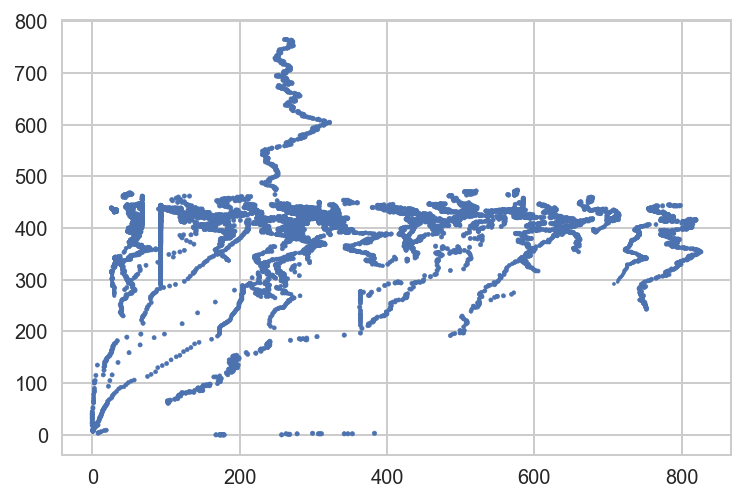

In [22]:
#Scatterplot for lerate and cpi
df2 = df.copy()
for c in ['lerate','lcpi']:
    df2[c] = df2[c].astype('category').cat.codes

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df2['lerate'],df2['lcpi'], s=df2['lindprod'])

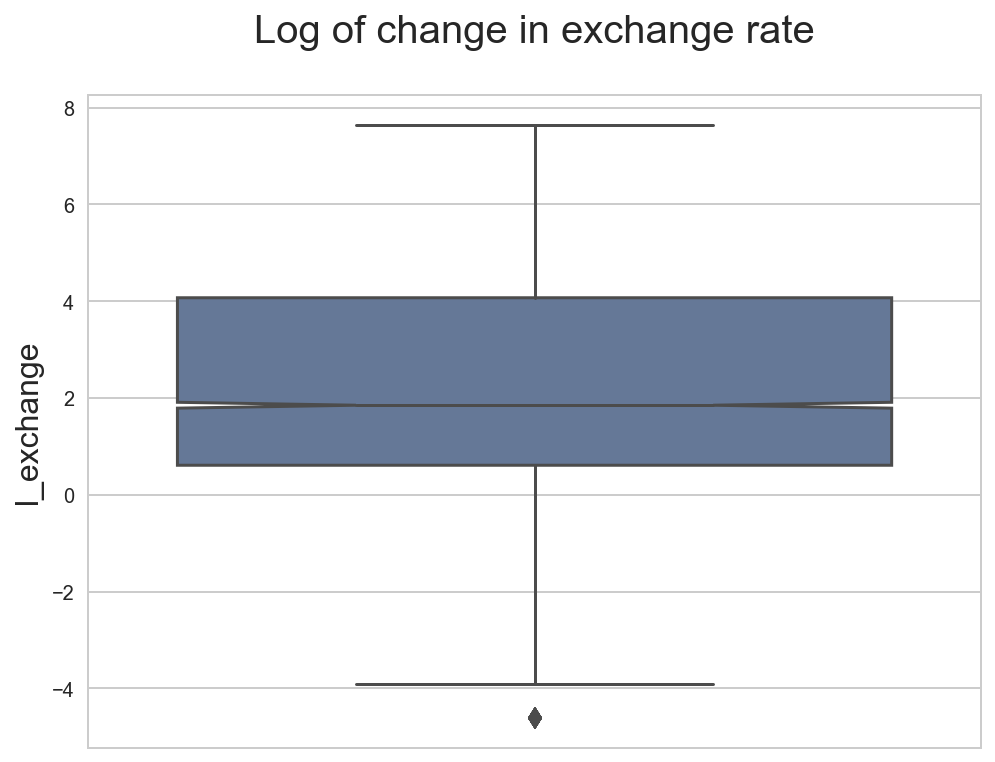

In [23]:
#Detecting and eliminating outliers - Log of exchange rate
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.lerate, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('l_exchange', fontsize=16)
ax.set_title('Log of change in exchange rate\n', fontsize=20)

plt.show()

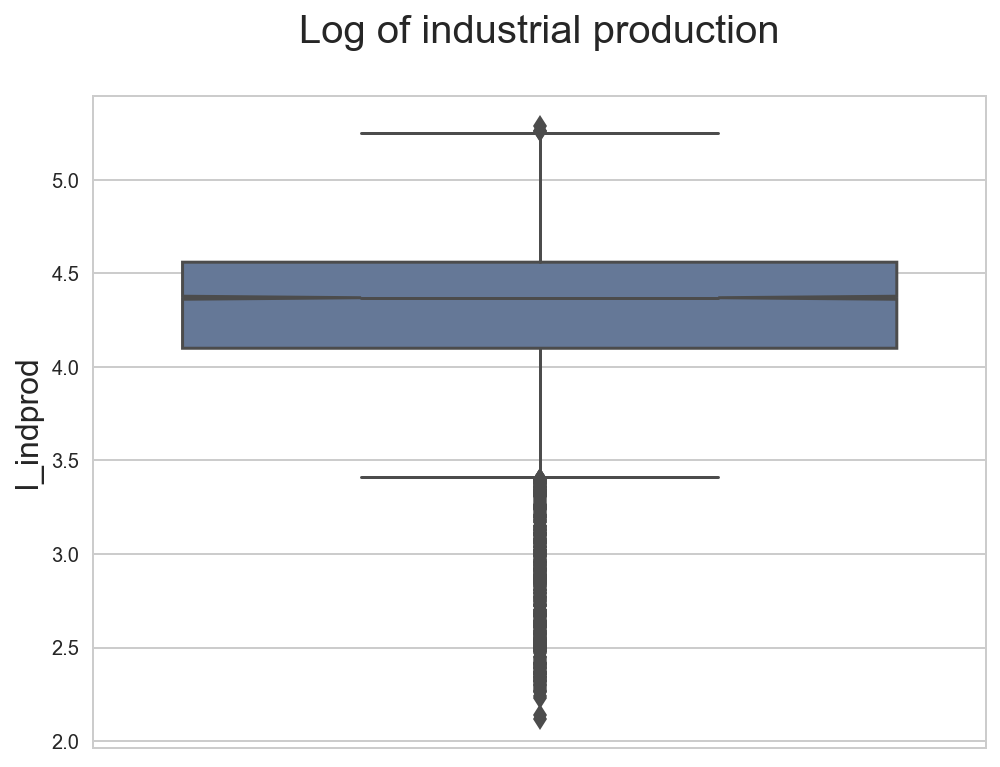

In [24]:
#Detecting and eliminating outliers - industrial production
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.lindprod, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('l_indprod', fontsize=16)
ax.set_title('Log of industrial production\n', fontsize=20)

plt.show()

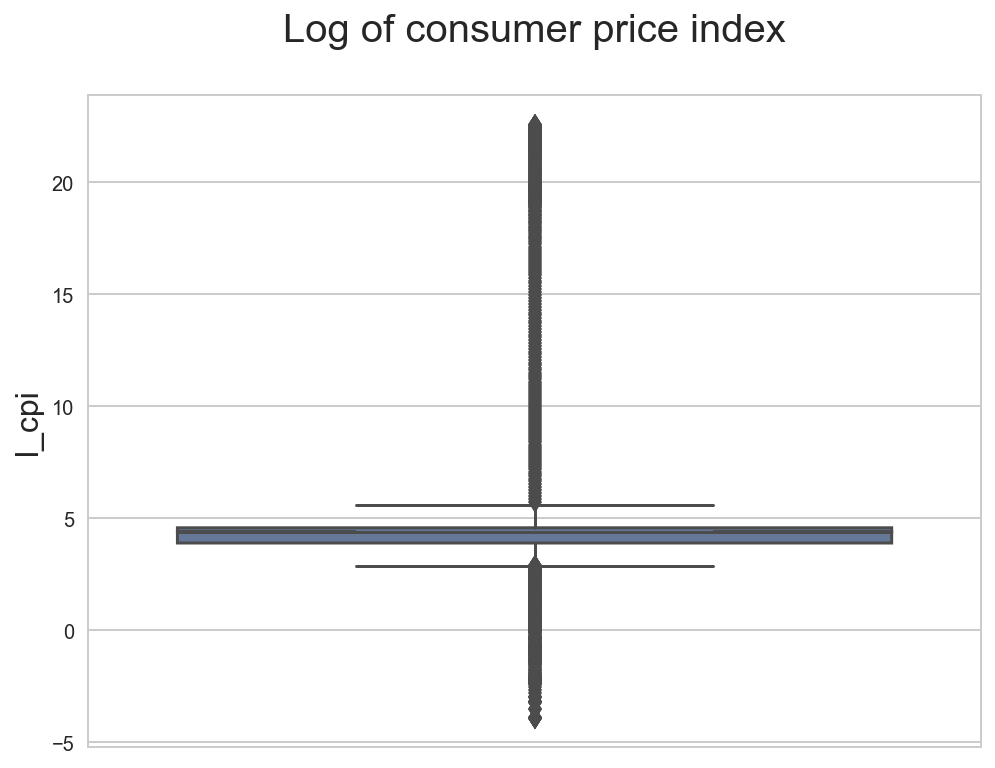

In [25]:
#Detecting and eliminating outliers - consumer price index
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.lcpi, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('l_cpi', fontsize=16)
ax.set_title('Log of consumer price index\n', fontsize=20)

plt.show()

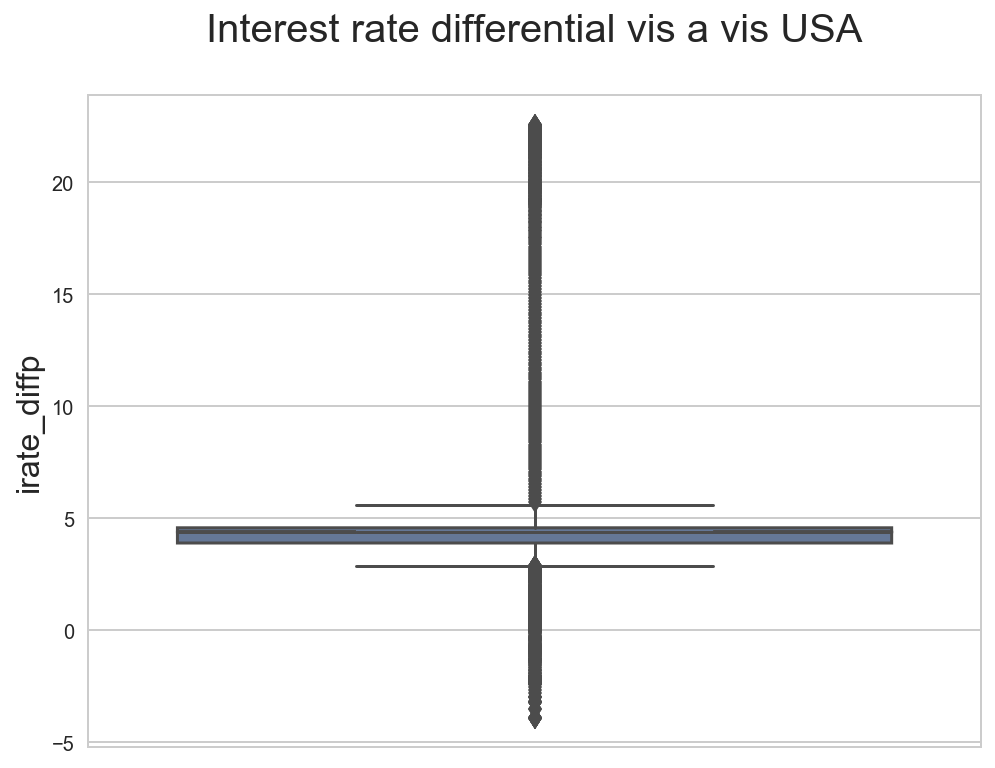

In [26]:
#Detecting and eliminating outliers - interest rate differential
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.lcpi, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('irate_diffp', fontsize=16)
ax.set_title('Interest rate differential vis a vis USA\n', fontsize=20)

plt.show()

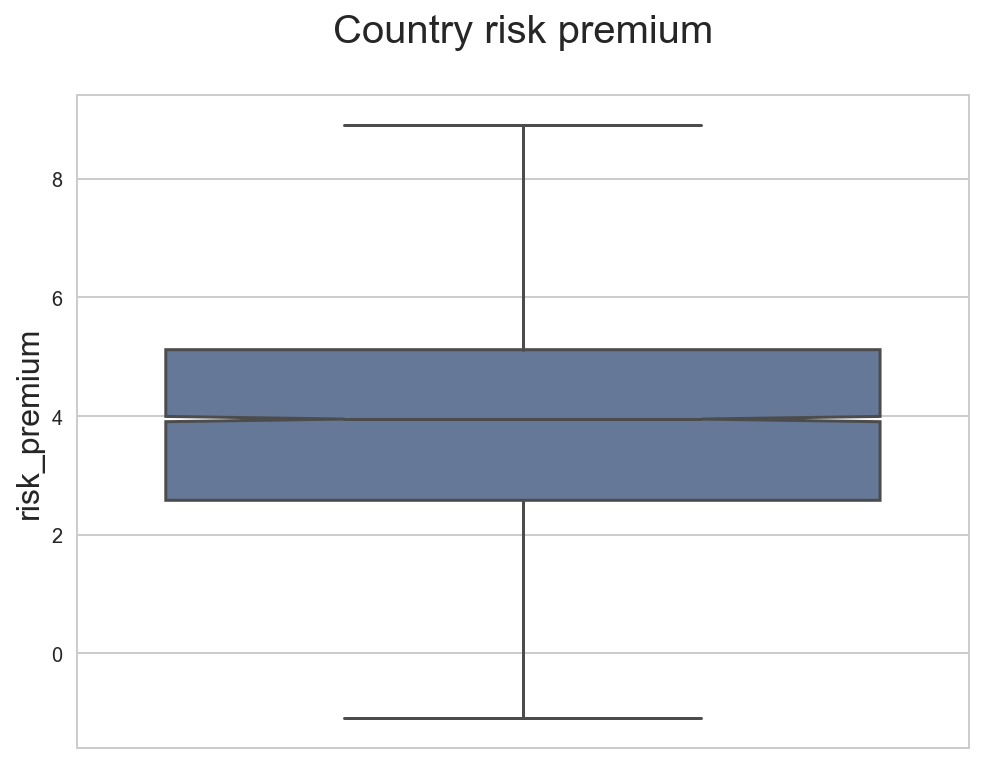

In [27]:
#Detecting and eliminating outliers - country risk premium
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.riskprem, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('risk_premium', fontsize=16)
ax.set_title('Country risk premium\n', fontsize=20)

plt.show()

IRP mean: 0.088136120443
IRP std: 0.624429592049


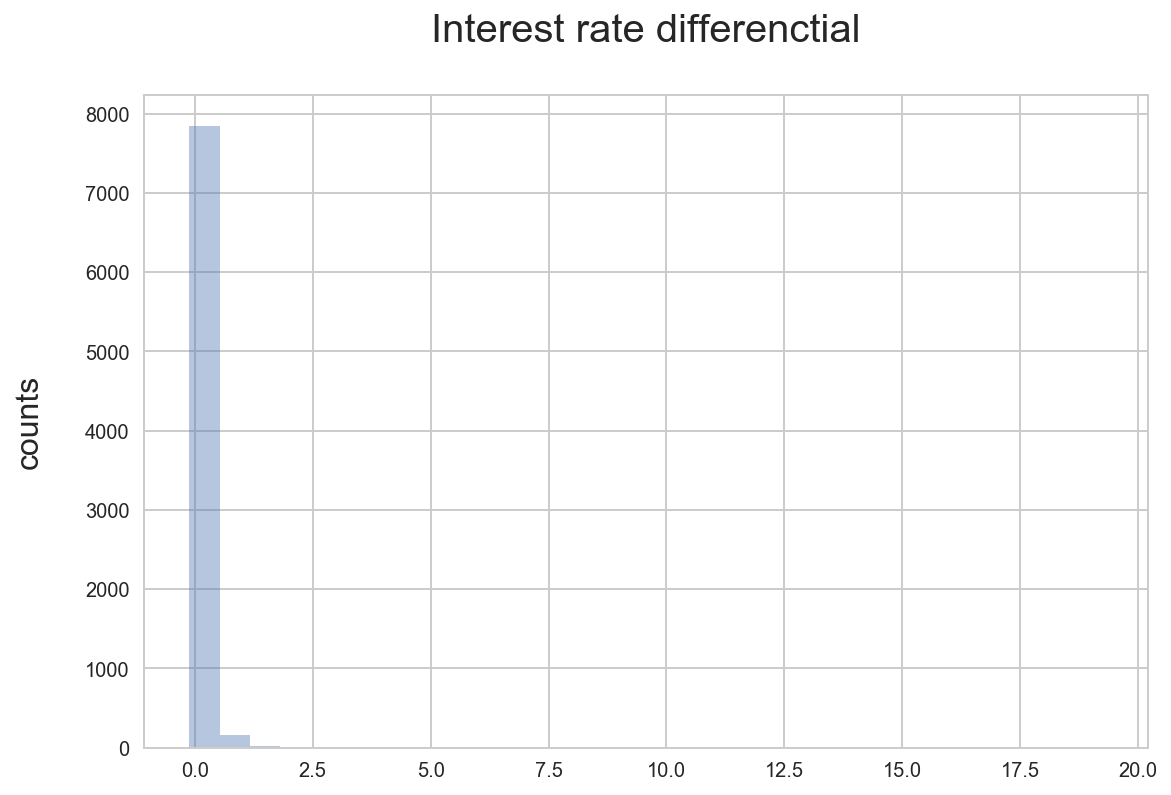

In [29]:
iratediffp = df.irate_diffp.values

irp_mean = np.mean(iratediffp)
irp_std = np.std(iratediffp)

print 'IRP mean:', irp_mean
print 'IRP std:', irp_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(iratediffp, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Interest rate differenctial\n', fontsize=20)

plt.show()

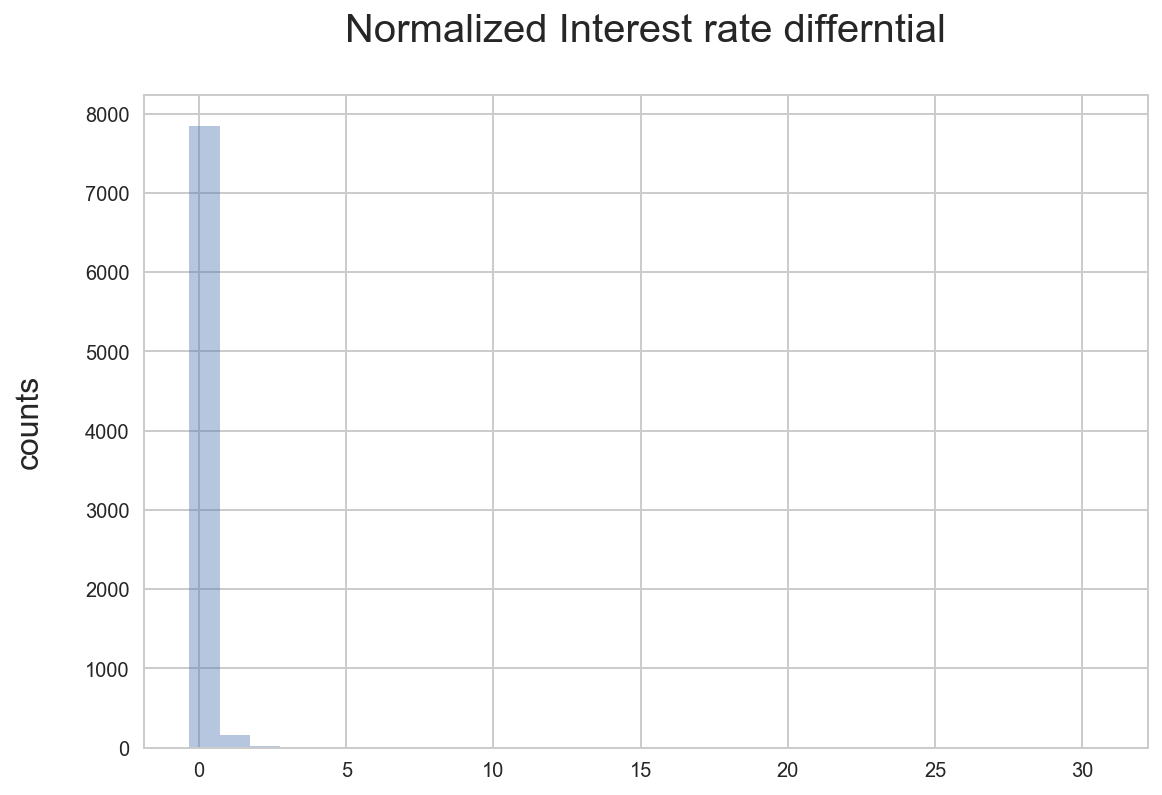

In [30]:
#Normalizing the interest rate differential variable
irp_norm = (iratediffp - irp_mean) / irp_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(irp_norm, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized Interest rate differntial\n', fontsize=20)

plt.show()

8037
8012


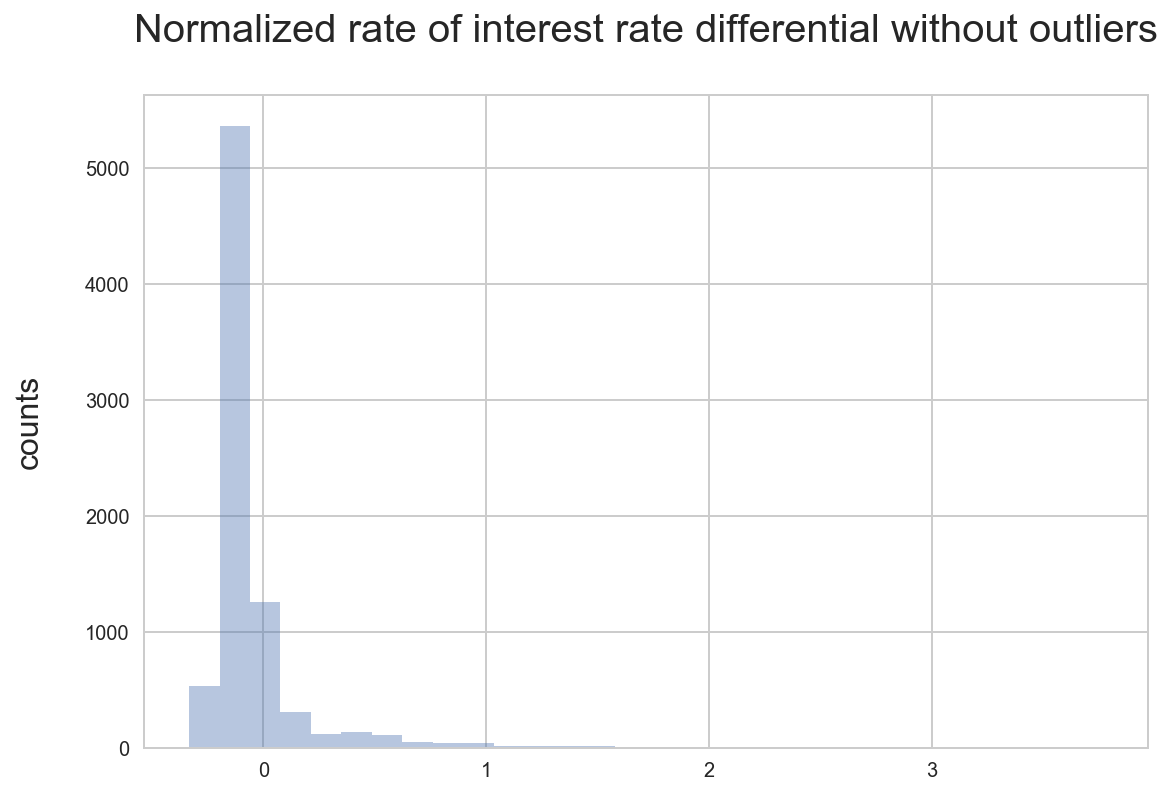

In [31]:
outlier_mask = (np.abs(irp_norm) < 4)
print len(irp_norm)
irp_norm_no_outliers = irp_norm[outlier_mask]
print len(irp_norm_no_outliers)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(irp_norm_no_outliers, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized rate of interest rate differential without outliers\n', fontsize=20)

plt.show()

LIP mean: 4.26793081996
LIP std: 0.435936233118


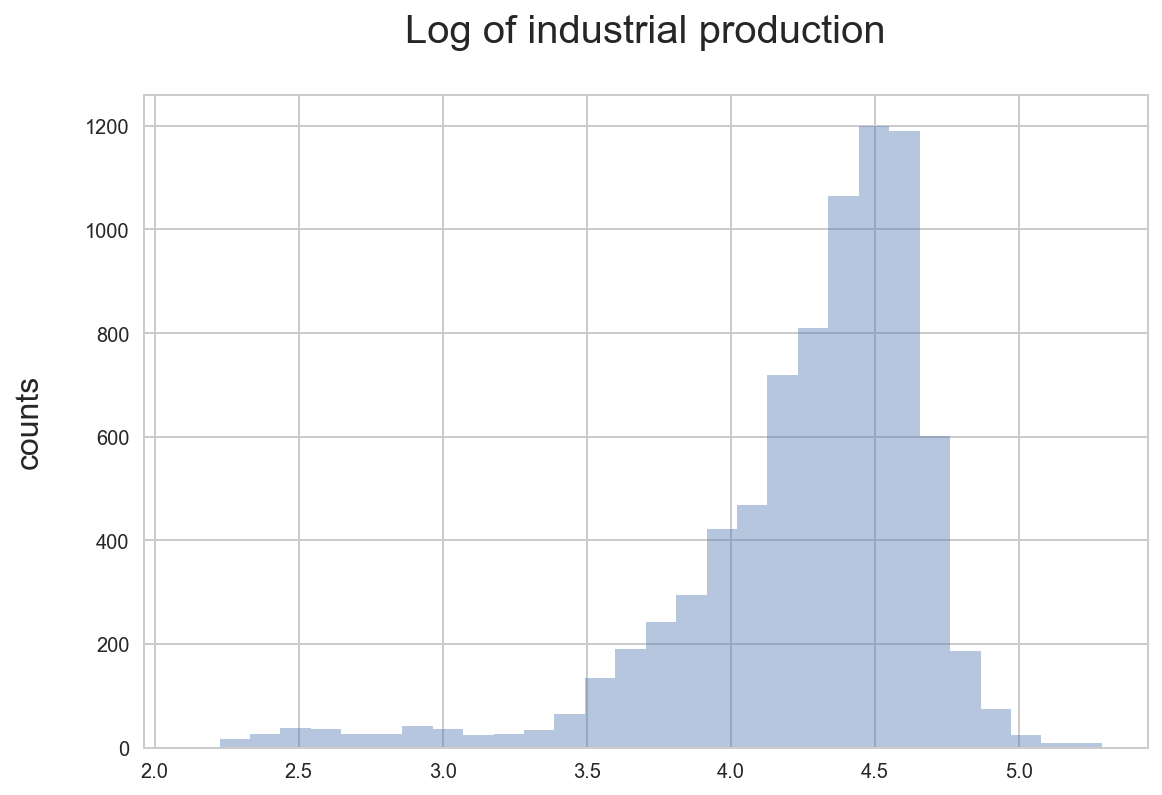

In [32]:
# Normalization process of log of industrial production
l_ip = df.lindprod.values

lip_mean = np.mean(l_ip)
lip_std = np.std(l_ip)

print 'LIP mean:', lip_mean
print 'LIP std:', lip_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(l_ip, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Log of industrial production\n', fontsize=20)

plt.show()

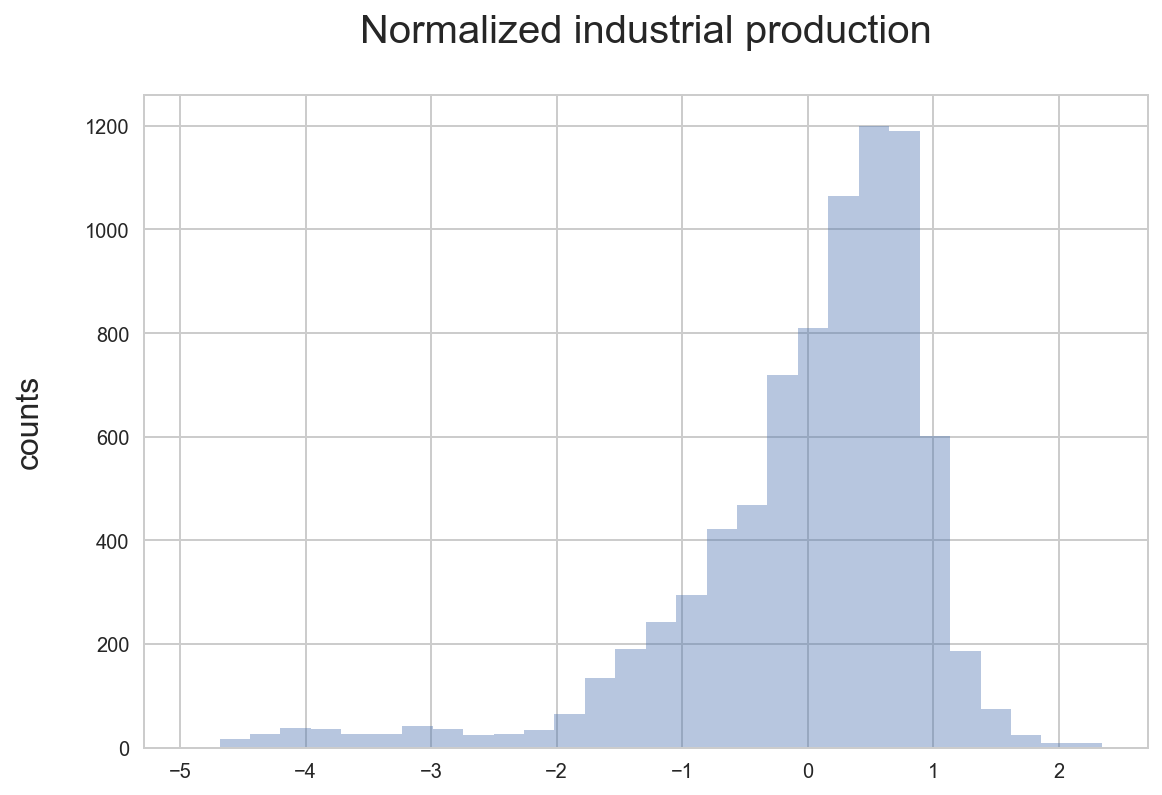

In [33]:
#Normalizing the industrial production variable
lip_norm = (l_ip - lip_mean) / lip_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(lip_norm, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized industrial production\n', fontsize=20)

plt.show()

8037
7966


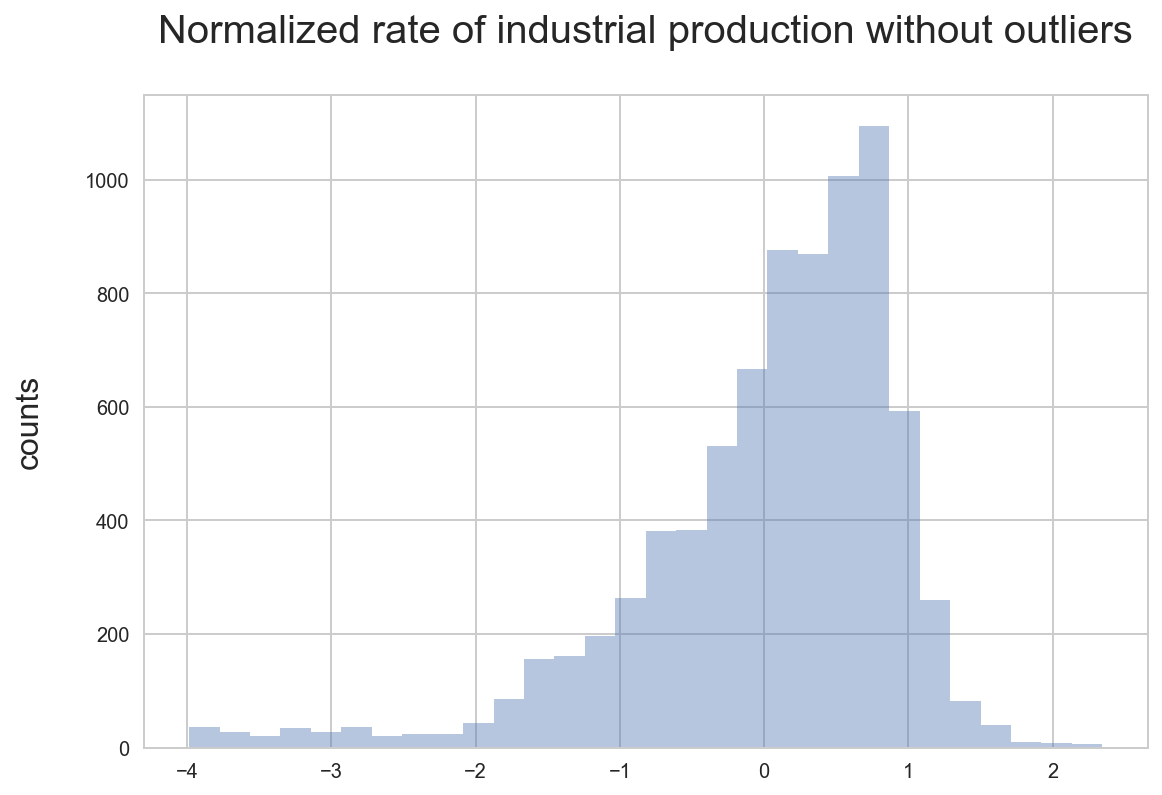

In [34]:
#Normalization porcess of industrial production
outlier_mask = (np.abs(lip_norm) < 4)
print len(lip_norm)
lip_norm_no_outliers = lip_norm[outlier_mask]
print len(lip_norm_no_outliers)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(lip_norm_no_outliers, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized rate of industrial production without outliers\n', fontsize=20)

plt.show()

lcpi mean: 4.48848948613
lcpi std: 2.83995701324


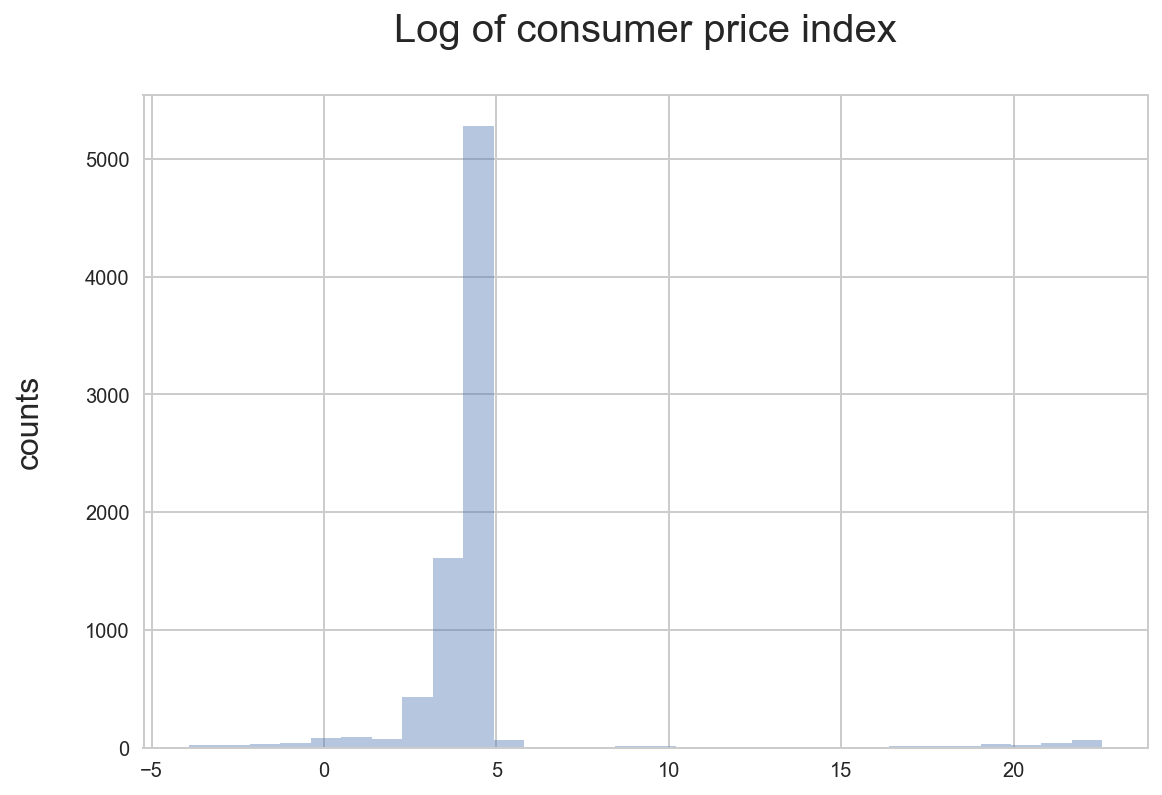

In [35]:
l_cpi = df.lcpi.values

lcpi_mean = np.mean(l_cpi)
lcpi_std = np.std(l_cpi)

print 'lcpi mean:', lcpi_mean
print 'lcpi std:', lcpi_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(l_cpi, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Log of consumer price index\n', fontsize=20)

plt.show()


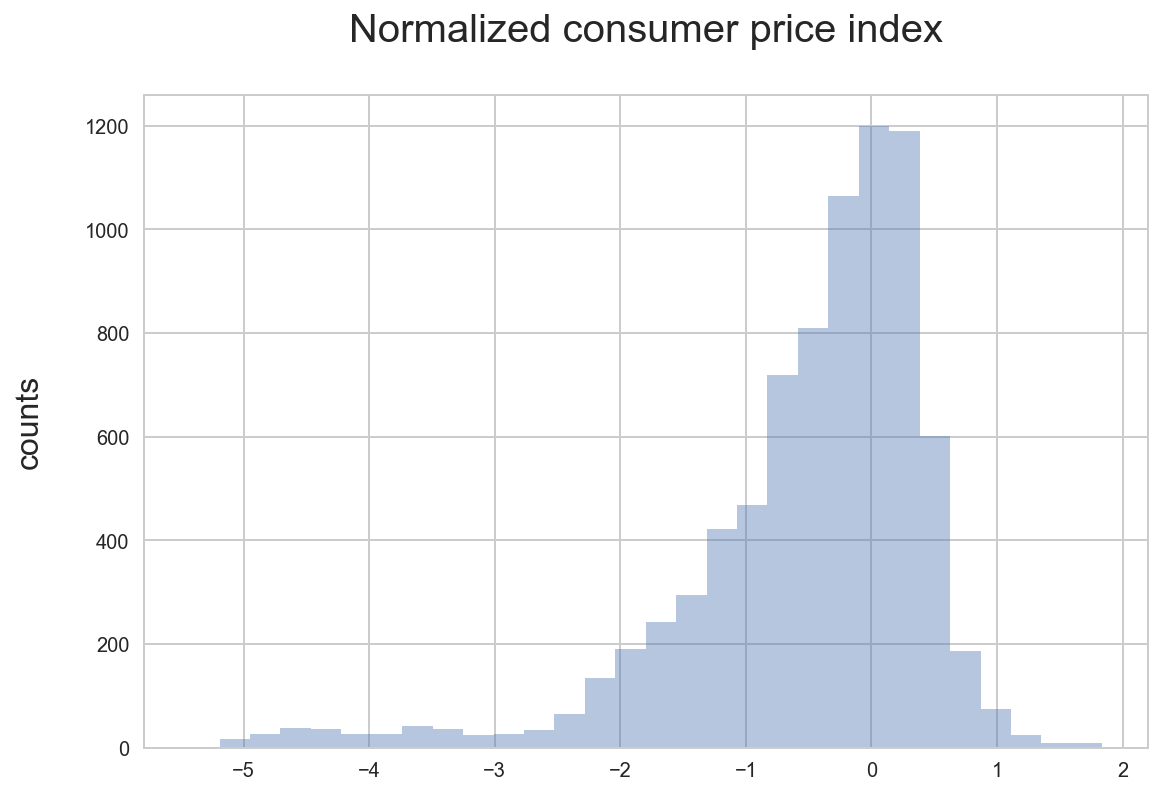

In [36]:
#Normalizing the consumer price index variable
lcpi_norm = (l_ip - lcpi_mean) / lip_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(lcpi_norm, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized consumer price index\n', fontsize=20)

plt.show()

8037
7894


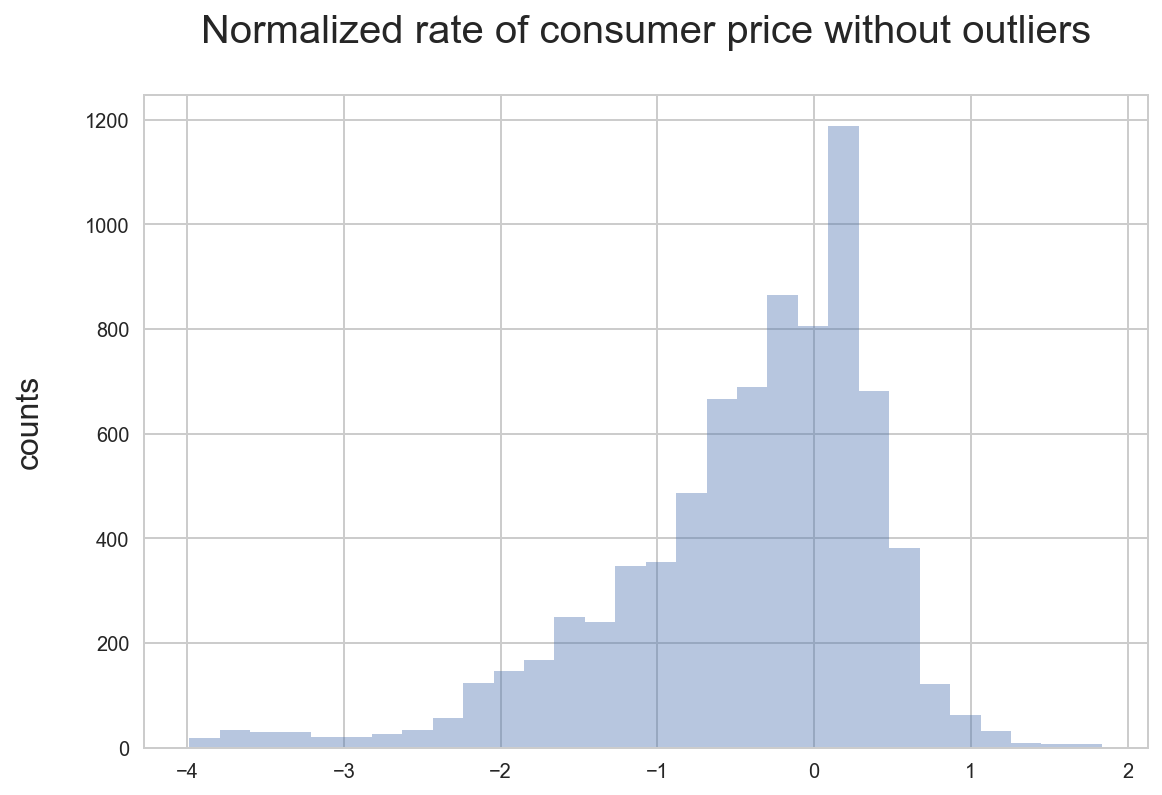

In [37]:
#Remving outliers from consumer price index
outlier_mask = (np.abs(lcpi_norm) < 4)
print len(lcpi_norm)
lcpi_norm_no_outliers = lcpi_norm[outlier_mask]
print len(lcpi_norm_no_outliers)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(lcpi_norm_no_outliers, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized rate of consumer price without outliers\n', fontsize=20)

plt.show()

In [39]:
#Linear regression to decipher the relationship between interest rate differential and exchange rates ; considering outliers 
#in interest rate differential
lm_stats = smf.ols(formula='df.lerate ~ df.irate_diffp', data=df).fit()
print lm_stats.summary()

                            OLS Regression Results                            
Dep. Variable:              df.lerate   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     30.97
Date:                Mon, 27 Feb 2017   Prob (F-statistic):           2.70e-08
Time:                        12:30:07   Log-Likelihood:                -18244.
No. Observations:                8037   AIC:                         3.649e+04
Df Residuals:                    8035   BIC:                         3.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          2.3314      0.026     88.

In [40]:
#Conducting the jarque-berra test for normality
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(lm_stats.resid)
print (lzip(name, test))
print ("\n========\n")

[('Jarque-Bera', 248.83835398739305), ('Chi^2 two-tail prob.', 9.2350231551733856e-55), ('Skew', 0.37301773428476526), ('Kurtosis', 2.568132654225126)]




In [41]:
#Plotting histograms for key variables
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
#     dist = sns.distplot(data, kde=False, bins=30)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

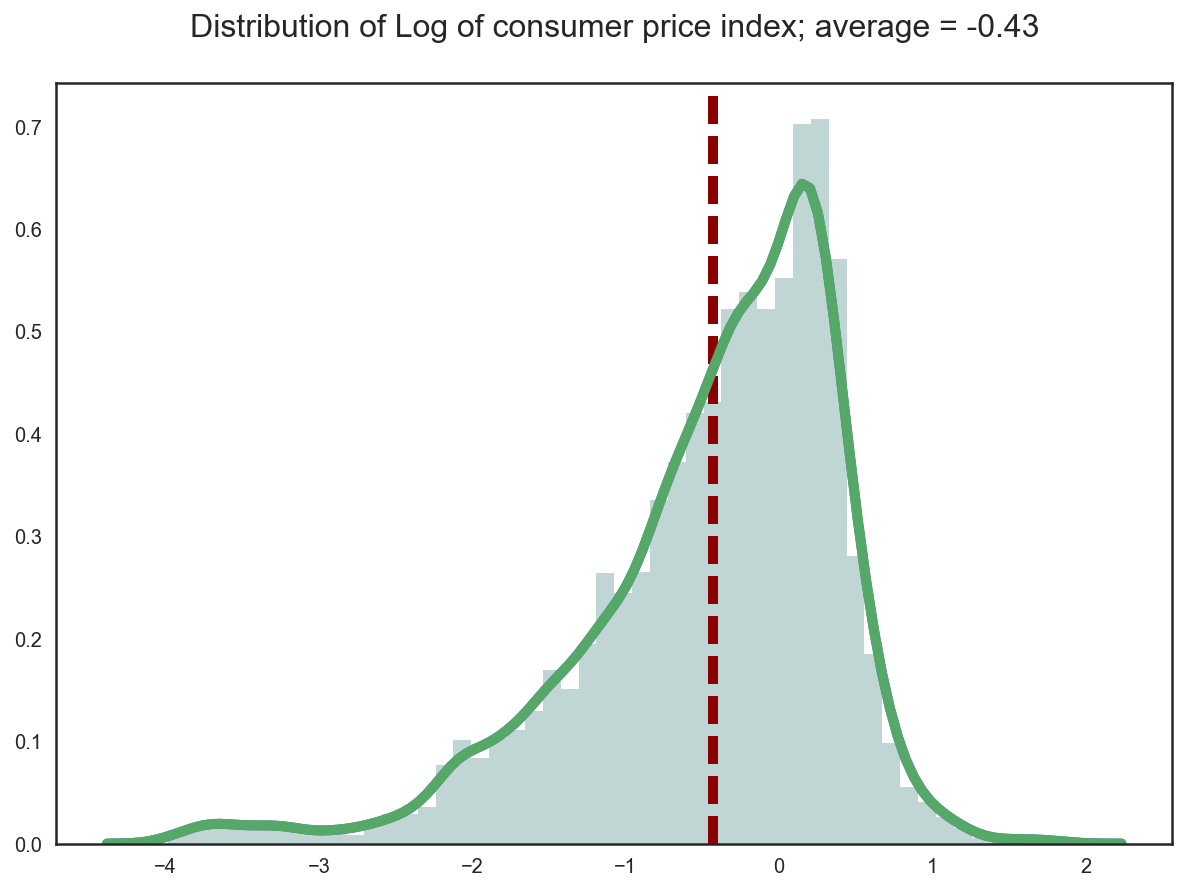

In [42]:
#Histogram of consumer price index without outliers
histogram_plotter("Log of consumer price index", lcpi_norm_no_outliers)

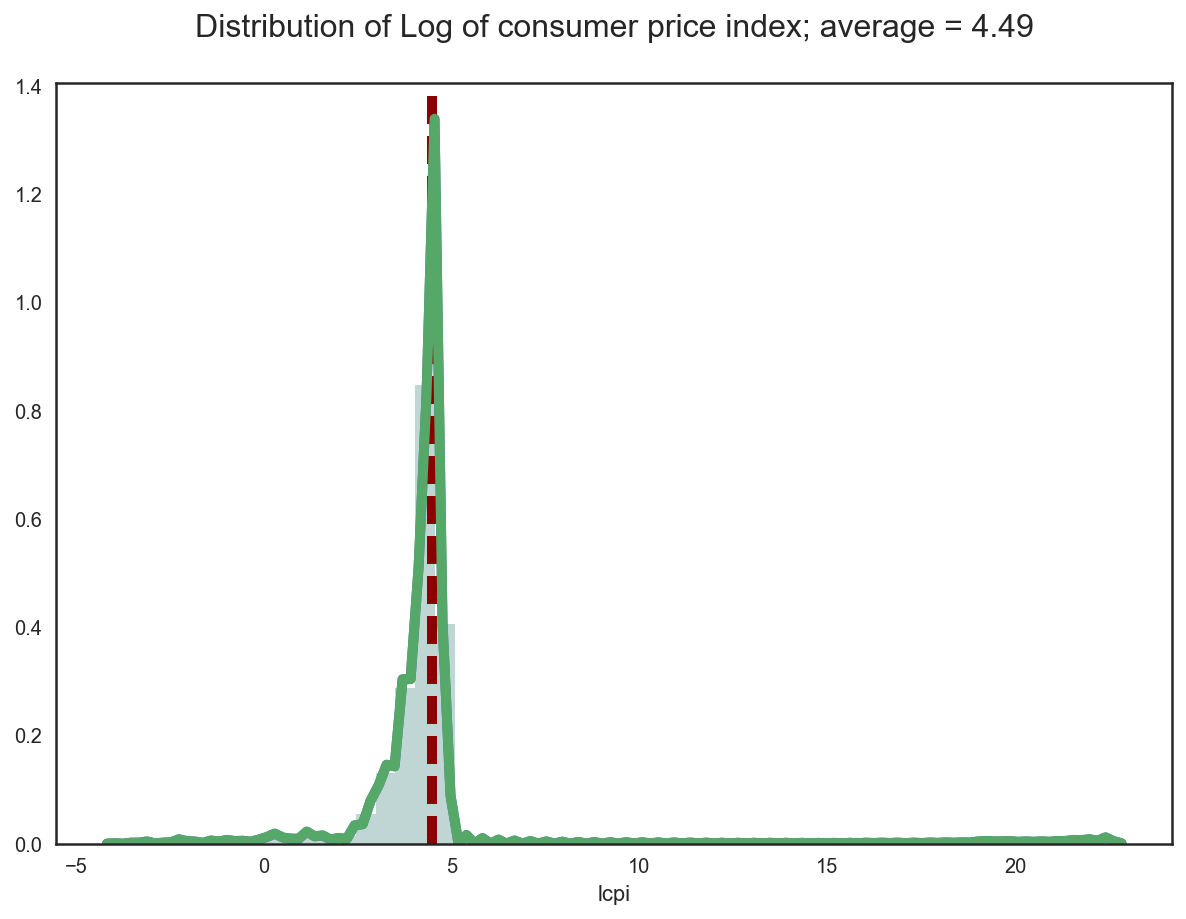

In [43]:
#Histogram of consumer price index with potential outliers
histogram_plotter("Log of consumer price index",df.lcpi  )

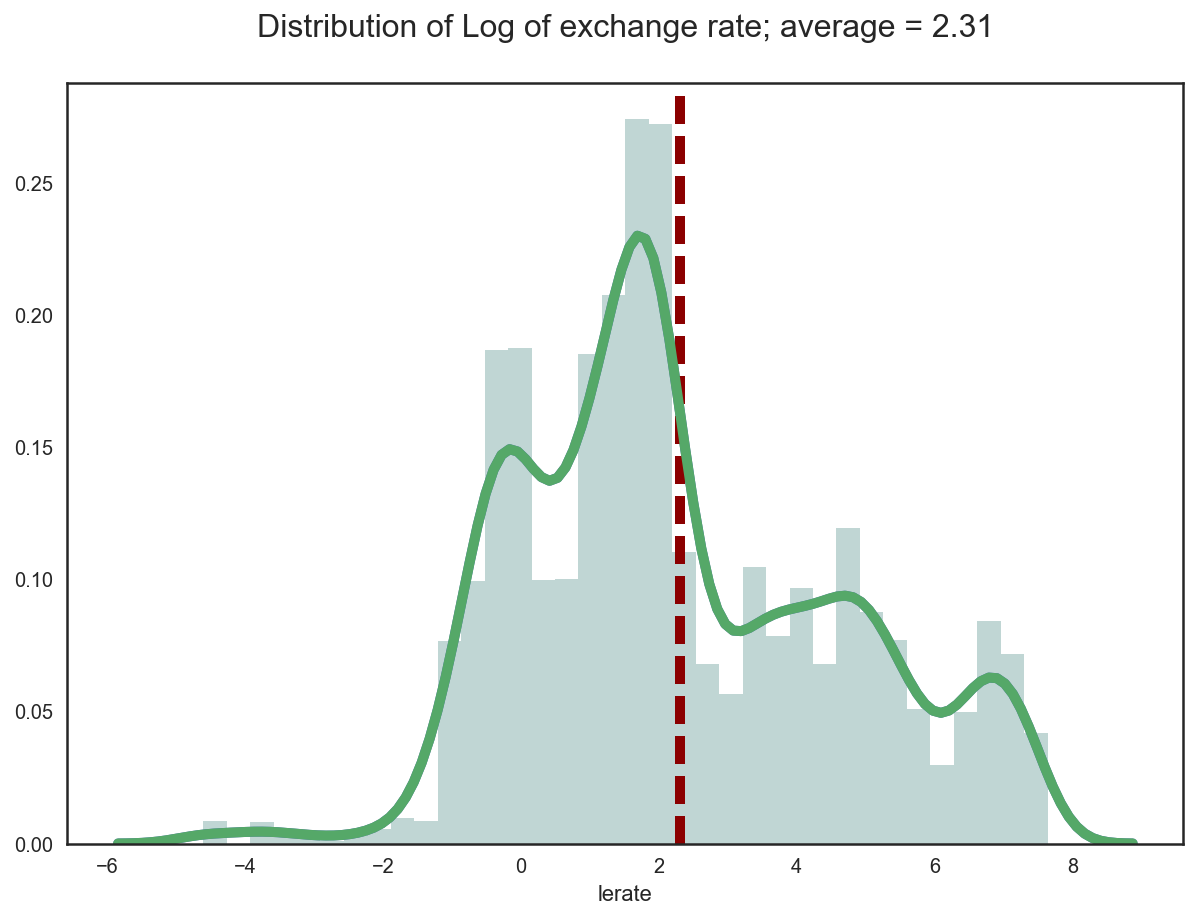

In [44]:
#Histogram of log of exchange rate  - No outliers detected in boxplot
histogram_plotter("Log of exchange rate", df.lerate)

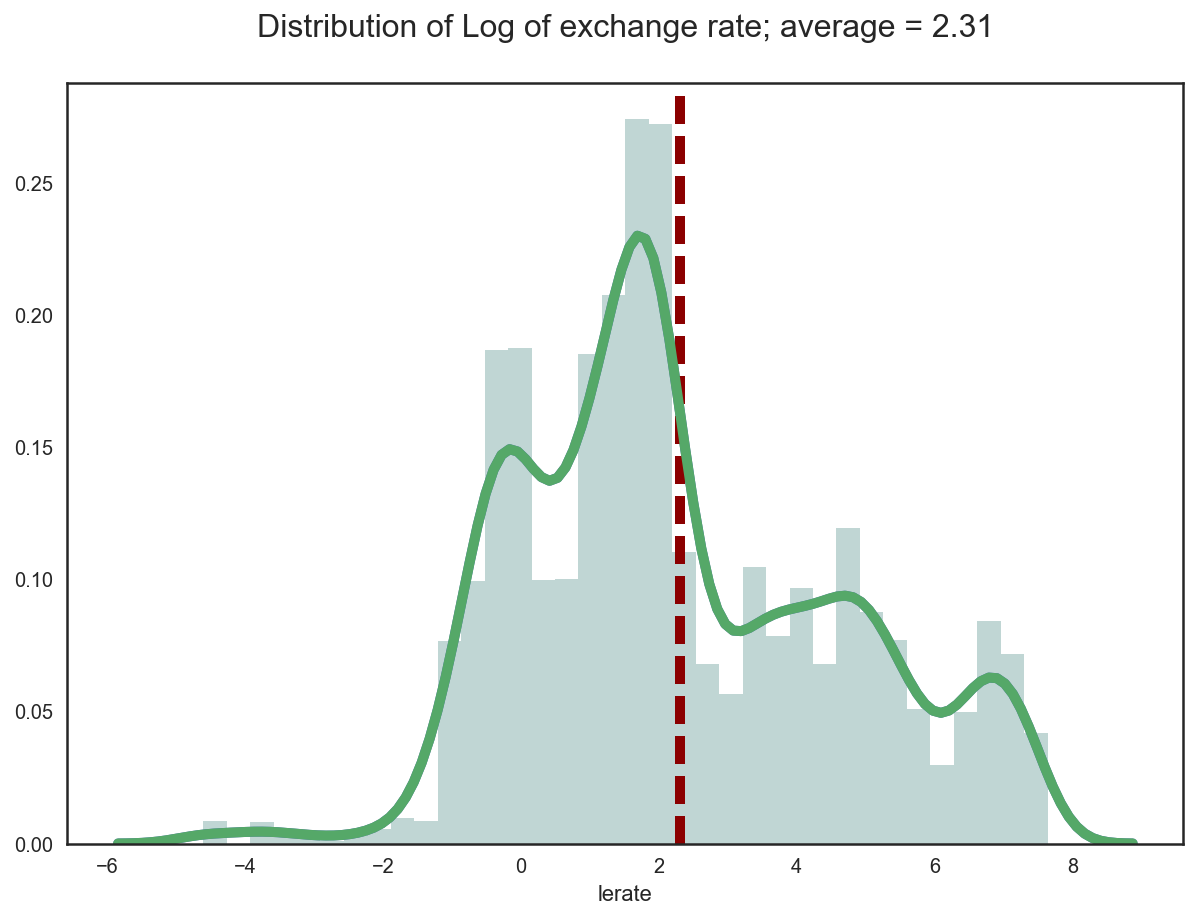

In [45]:
#Histogram of log of industrial with potential outliers
histogram_plotter("Log of exchange rate", df.lerate )

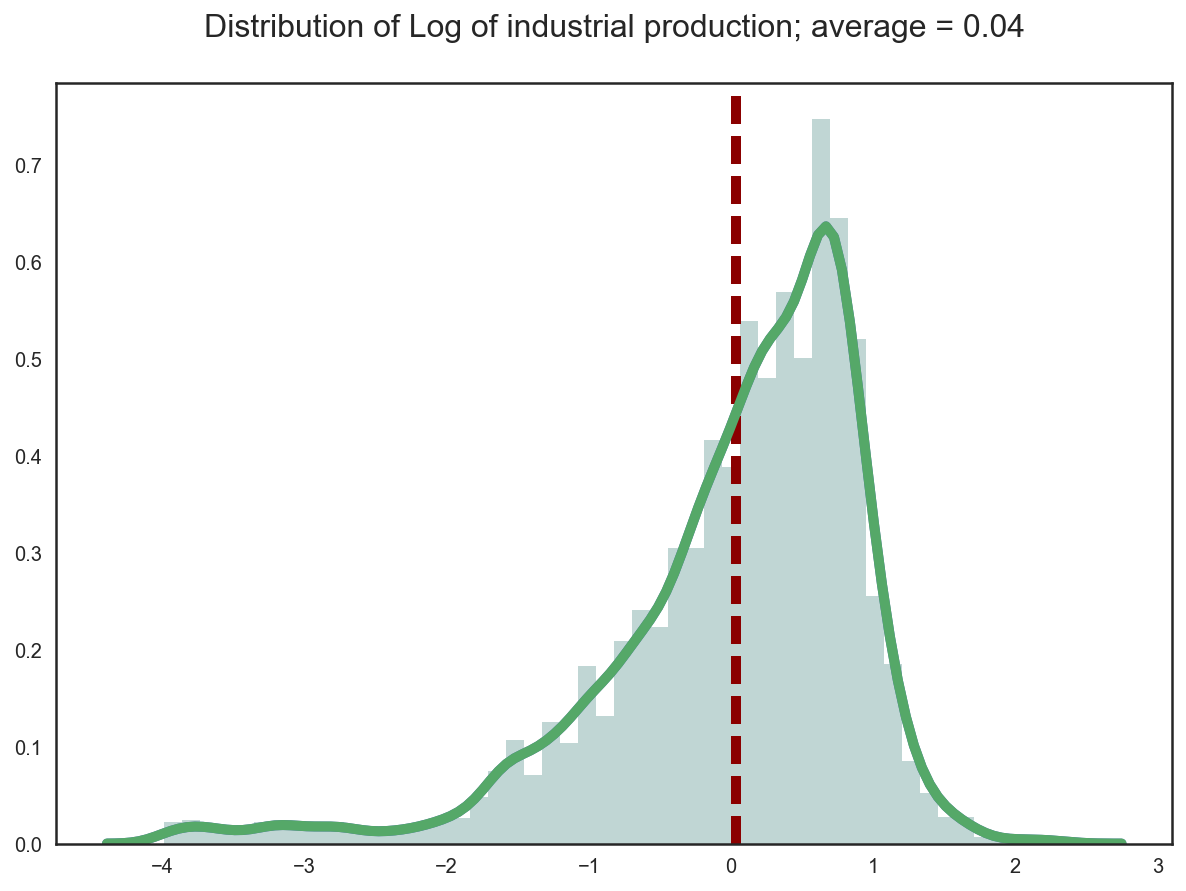

In [46]:
#Histogram of log of industrial production WITHOUT potential outliers
histogram_plotter("Log of industrial production", lip_norm_no_outliers)

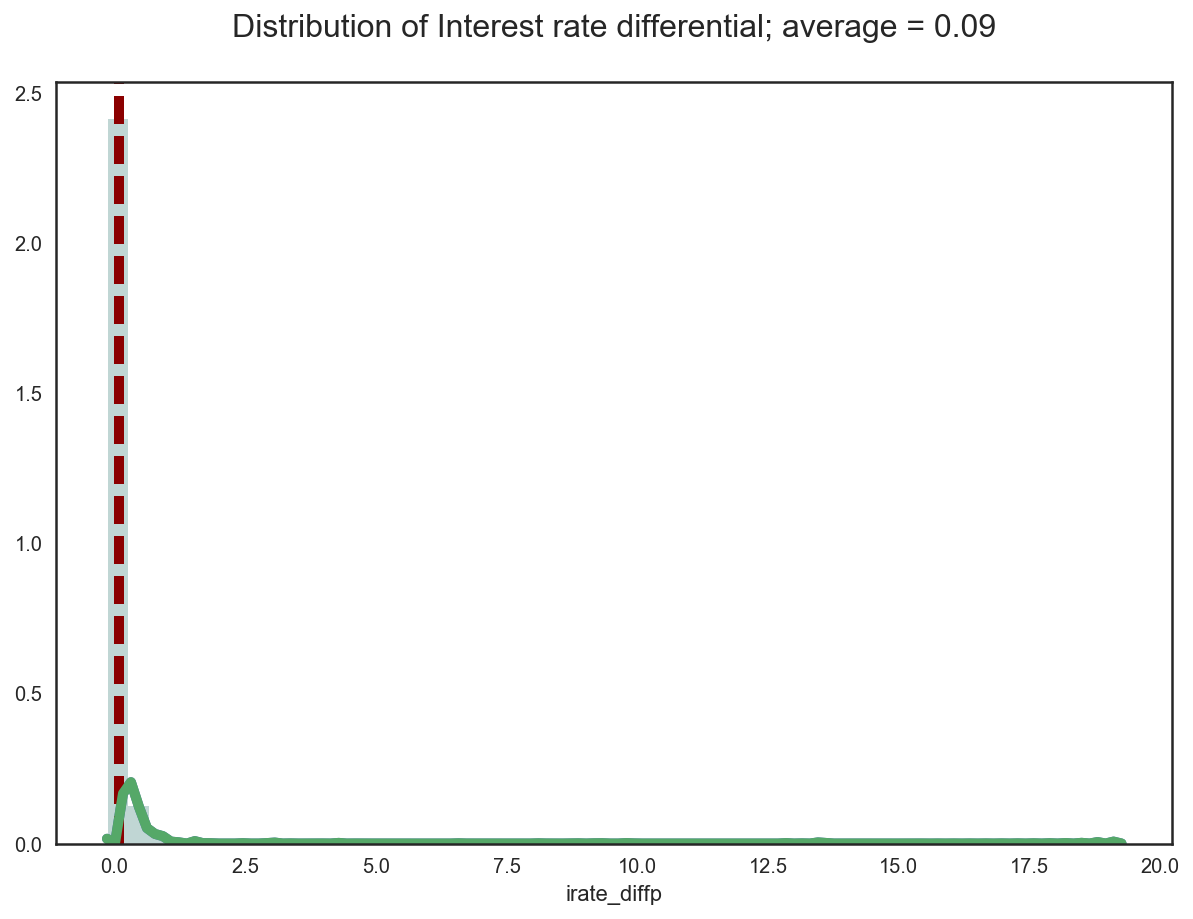

In [47]:
#Histogram of interest rate differential with potential outliers
histogram_plotter("Interest rate differential", df.irate_diffp )

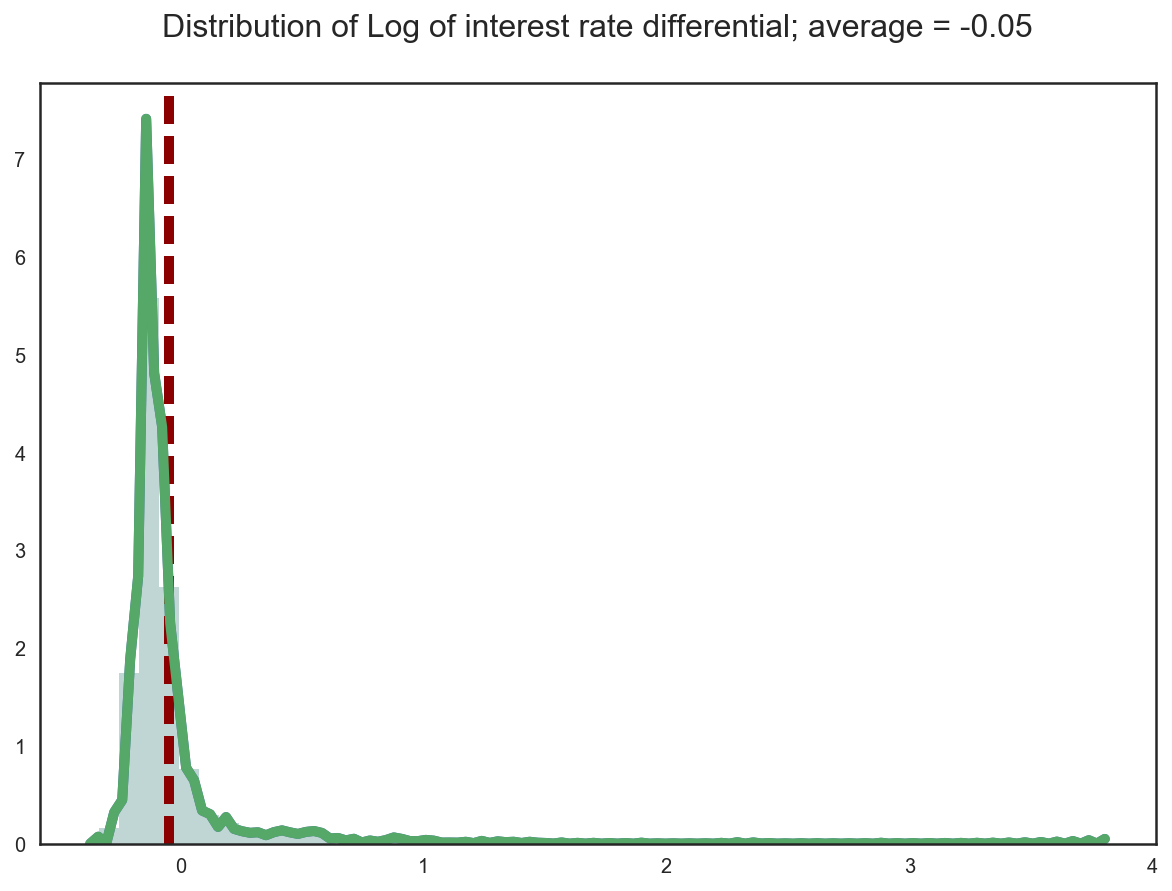

In [48]:
#Histogram of interest rate differential WITHOUT potential outliers
histogram_plotter("Log of interest rate differential", irp_norm_no_outliers)

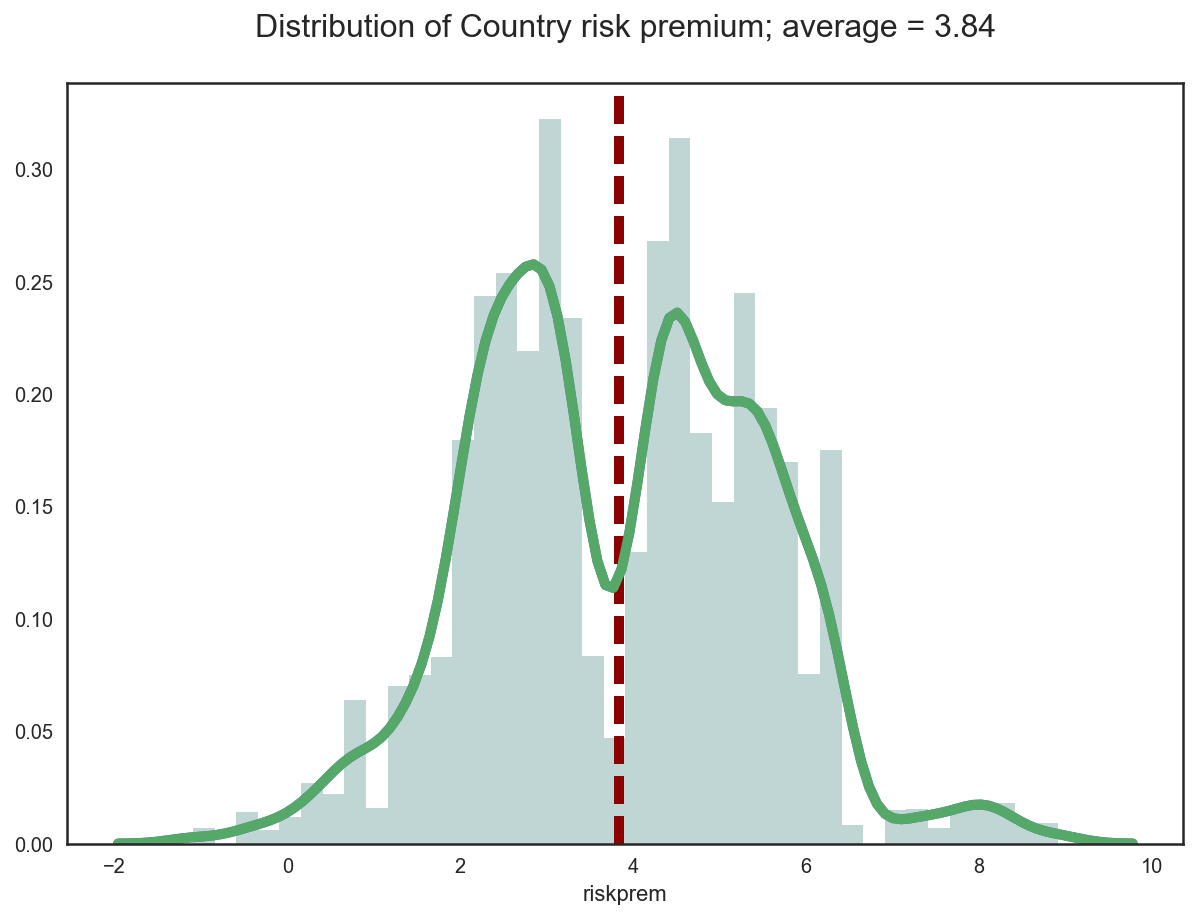

In [49]:
#Histogram of country risk premium - no potential outlier in boxplot
histogram_plotter("Country risk premium", df.riskprem)

In [50]:
#Omni test for the residuals
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(lm_stats.resid)
lzip(name, test)

[('Chi^2', 278.3522220589), ('Two-tail probability', 3.6023256226690612e-61)]

In [51]:
#Testing for multicollinearity - conditional number
np.linalg.cond(lm_stats.model.exog)

1.6216910003939535

In [52]:
#Testing for heteroskedasticy - Breush-Pagan test:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breushpagan(lm_stats.resid, lm_stats.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 5.8262919751932269),
 ('p-value', 0.015788368150899231),
 ('f-value', 5.8290677953954786),
 ('f p-value', 0.015785676678682279)]

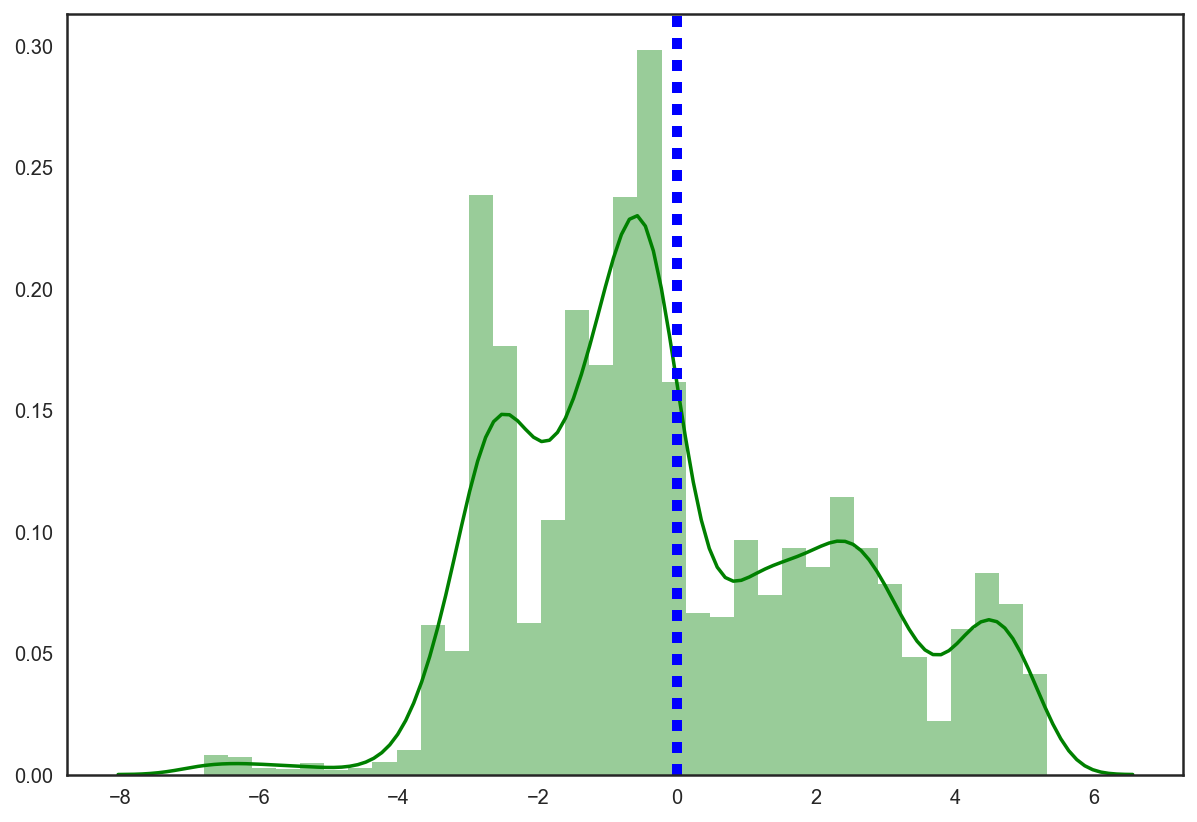

In [54]:
#Determining the residuals
np.mean(lm_stats.resid)
sns.distplot(lm_stats.resid, color='g')
plt.axvline(np.mean(lm_stats.resid), color='b', linestyle='dotted', linewidth=5)
plt.show()

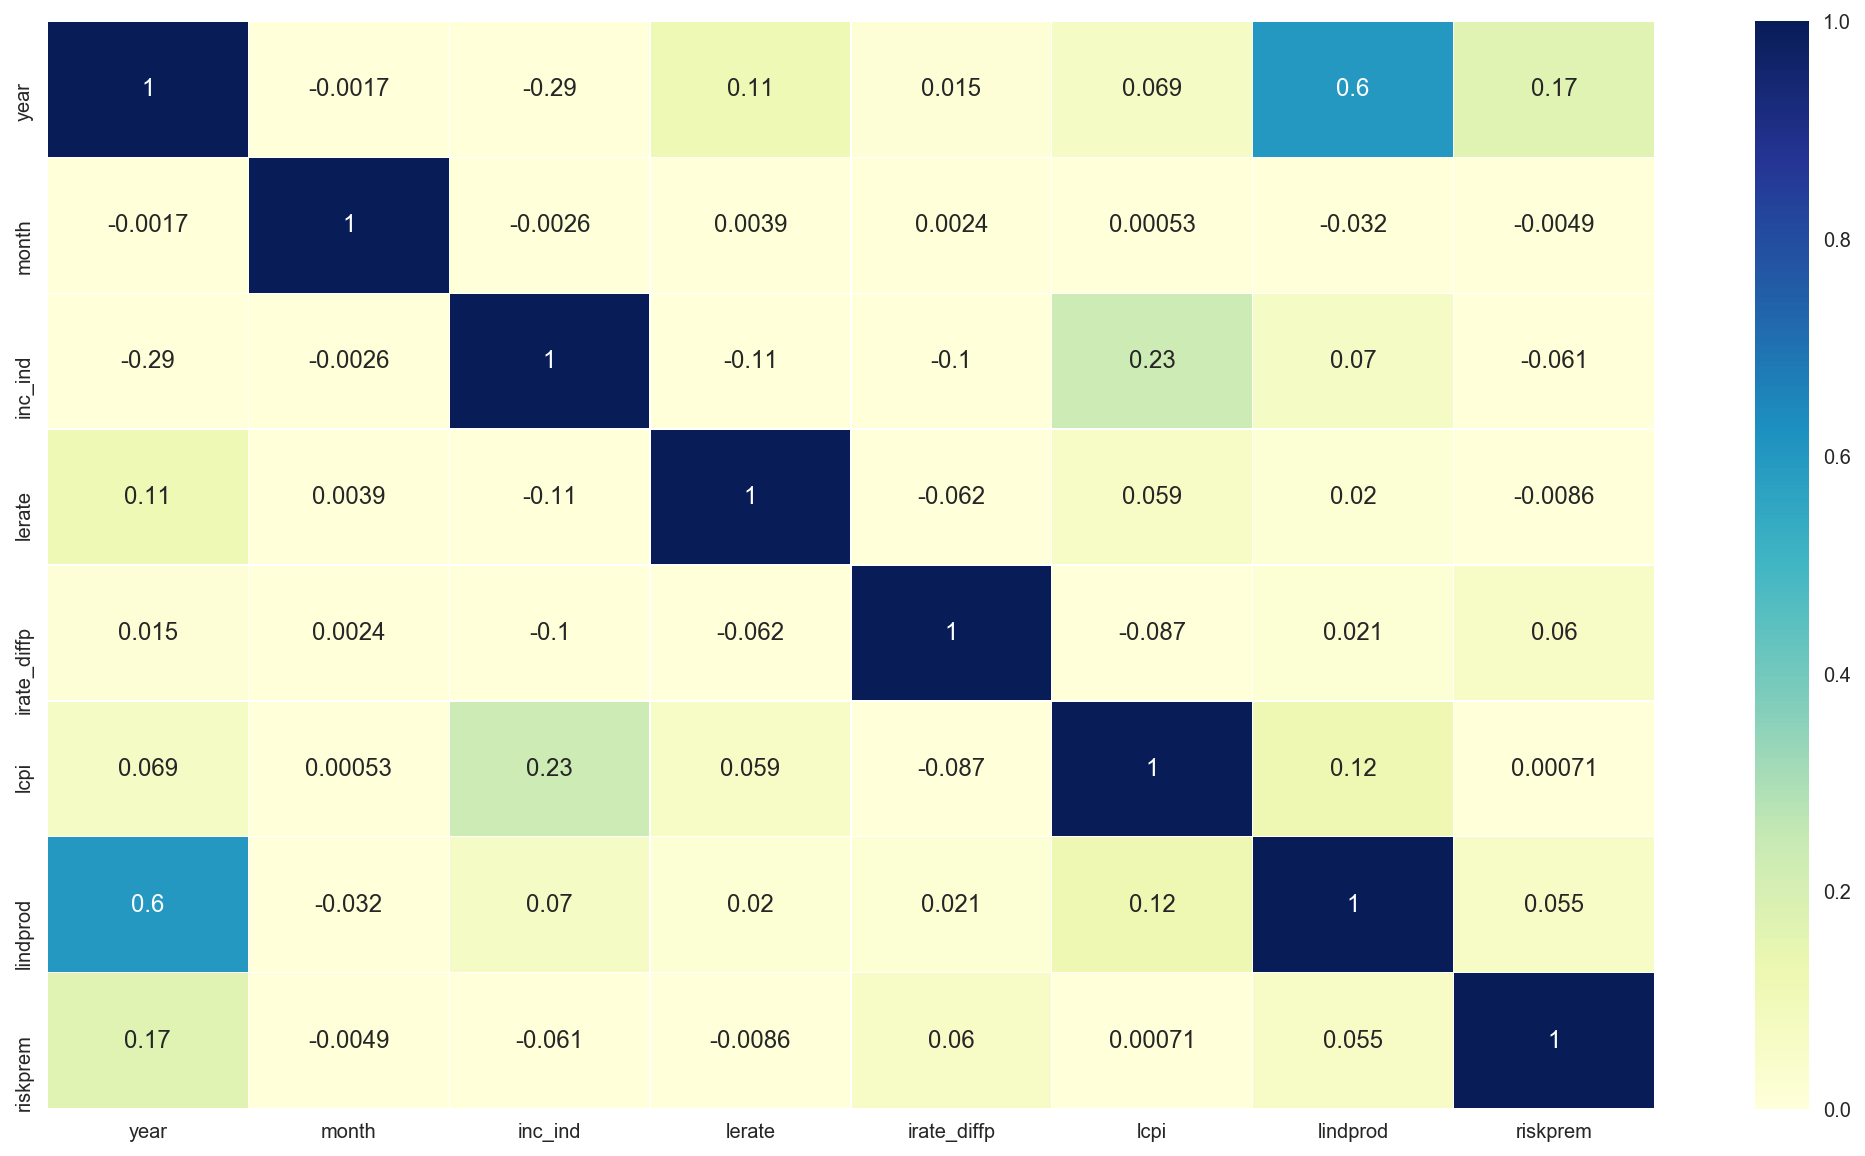

In [55]:
#Running the correlation martix to deduce the relationship between variales in the dataset
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

In [56]:
#Shows the correlation between the various items mentioned in the dataset
df_corr = df.corr()
print (df_corr)

                 year     month   inc_ind    lerate  irate_diffp      lcpi  \
year         1.000000 -0.001652 -0.291342  0.112239     0.015485  0.069274   
month       -0.001652  1.000000 -0.002634  0.003860     0.002449  0.000529   
inc_ind     -0.291342 -0.002634  1.000000 -0.113612    -0.100289  0.233448   
lerate       0.112239  0.003860 -0.113612  1.000000    -0.061968  0.058729   
irate_diffp  0.015485  0.002449 -0.100289 -0.061968     1.000000 -0.086969   
lcpi         0.069274  0.000529  0.233448  0.058729    -0.086969  1.000000   
lindprod     0.600440 -0.031835  0.069938  0.020364     0.021485  0.120988   
riskprem     0.165746 -0.004939 -0.061187 -0.008608     0.059546  0.000708   

             lindprod  riskprem  
year         0.600440  0.165746  
month       -0.031835 -0.004939  
inc_ind      0.069938 -0.061187  
lerate       0.020364 -0.008608  
irate_diffp  0.021485  0.059546  
lcpi         0.120988  0.000708  
lindprod     1.000000  0.054984  
riskprem     0.054984  1.

In [57]:
#the data below shoes the log of consumer price index of the countries in the sample
df.groupby(['country'], sort=True)[['lcpi']].mean().sort_values(by=['lcpi'], ascending=False).reset_index

<bound method DataFrame.reset_index of                           lcpi
country                       
FRANCE               16.863800
SERBIA, REPUBLIC OF   4.698272
MALTA                 4.628378
LATVIA                4.612763
LITHUANIA             4.601081
ICELAND               4.578936
CANADA                4.542486
MACEDONIA, FYR        4.541720
ARMENIA               4.540364
BULGARIA              4.512468
JAPAN                 4.484737
EL SALVADOR           4.481856
CZECH REPUBLIC        4.441329
GERMANY               4.439596
GREECE                4.339444
SLOVAK REPUBLIC       4.289058
MALAYSIA              4.265607
UNITED STATES         4.161461
SWEDEN                4.156050
KOREA, REPUBLIC OF    4.144803
AUSTRIA               4.130633
NORWAY                4.129482
CROATIA               4.120995
JORDAN                4.084233
UNITED KINGDOM        4.071187
FINLAND               4.026767
PORTUGAL              3.968671
ITALY                 3.853130
HUNGARY               3.847544


In [58]:
#Country classification by risk premium
df.groupby(['country'], sort=True)[['riskprem']].mean().sort_values(by=['riskprem'], ascending=False).reset_index

<bound method DataFrame.reset_index of                      riskprem
country                      
ZAMBIA               4.906818
LATVIA               4.499079
BULGARIA             4.470390
TURKEY               4.410513
SERBIA, REPUBLIC OF  4.313333
LITHUANIA            4.139369
ROMANIA              4.086853
ARMENIA              4.082424
ICELAND              4.081418
MEXICO               4.011488
EL SALVADOR          4.010206
CROATIA              4.008720
KOREA, REPUBLIC OF   3.961348
CANADA               3.928378
RUSSIAN FEDERATION   3.921959
MACEDONIA, FYR       3.892258
MALAWI               3.875525
MALAYSIA             3.874636
PORTUGAL             3.869620
UNITED KINGDOM       3.841393
UNITED STATES        3.841393
SWEDEN               3.841393
JAPAN                3.836156
JORDAN               3.828416
KENYA                3.811650
NORWAY               3.765082
SLOVAK REPUBLIC      3.733508
GERMANY              3.657576
HUNGARY              3.632763
FRANCE               3.602800
F

In [59]:
#the data below shoes the log of industrial production of the countries in the sample
df.groupby(['country'], sort=True)[['lindprod']].mean().sort_values(by=['lindprod'], ascending=False).reset_index

<bound method DataFrame.reset_index of                      lindprod
country                      
ZAMBIA               4.873182
MALTA                4.683784
MALAWI               4.679153
MACEDONIA, FYR       4.630323
SERBIA, REPUBLIC OF  4.613704
ICELAND              4.541135
ROMANIA              4.526224
EL SALVADOR          4.514639
CANADA               4.512703
UNITED KINGDOM       4.481621
GREECE               4.463056
SLOVAK REPUBLIC      4.446283
CROATIA              4.440000
ITALY                4.419084
PORTUGAL             4.417215
JAPAN                4.413799
CZECH REPUBLIC       4.407341
LATVIA               4.389605
FRANCE               4.385000
BULGARIA             4.381948
TURKEY               4.368718
MEXICO               4.343939
SWEDEN               4.330228
LITHUANIA            4.323514
RUSSIAN FEDERATION   4.291959
GERMANY              4.282576
KENYA                4.263204
NORWAY               4.245129
UNITED STATES        4.242831
ARMENIA              4.148242
H

In [60]:
#the data below shoes the log of exchange rate of the countries in the sample
df.groupby(['country'], sort=True)[['lerate']].mean().sort_values(by=['lerate'], ascending=False).reset_index

<bound method DataFrame.reset_index of                        lerate
country                      
ITALY                7.192099
KOREA, REPUBLIC OF   6.802191
ARMENIA              6.143091
GREECE               5.640833
HUNGARY              5.022412
JAPAN                5.017506
PORTUGAL             4.999051
ICELAND              4.381277
SERBIA, REPUBLIC OF  4.129012
MACEDONIA, FYR       3.920430
KENYA                3.514660
SLOVAK REPUBLIC      3.513037
CZECH REPUBLIC       3.362543
RUSSIAN FEDERATION   2.692887
AUSTRIA              2.640700
MALAWI               2.508068
EL SALVADOR          2.170000
SWEDEN               1.884338
NORWAY               1.882094
FRANCE               1.728267
ZAMBIA               1.615909
CROATIA              1.596967
FINLAND              1.510267
LITHUANIA            1.226306
MALAYSIA             1.054466
MEXICO               0.875647
GERMANY              0.753232
BULGARIA             0.596104
ROMANIA              0.296084
CANADA               0.273946
U

In [61]:
#determining the risk premium of developed and developing countries
df.groupby(['Indicator'], sort=True)[['riskprem']].mean().sort_values(by=['riskprem'], ascending=False).reset_index

<bound method DataFrame.reset_index of             riskprem
Indicator           
Developing  3.944749
Developed   3.736953>

In [62]:
#determining the consumer price index of developed and developing countries
df.groupby(['Indicator'], sort=True)[['lcpi']].mean().sort_values(by=['lcpi'], ascending=False).reset_index

<bound method DataFrame.reset_index of                 lcpi
Indicator           
Developed   5.118130
Developing  3.823242>

In [63]:
#determining the interest rate differential of developed and developing countries
df.groupby(['Indicator'], sort=True)[['irate_diffp']].mean().sort_values(by=['irate_diffp'], ascending=False).reset_index

<bound method DataFrame.reset_index of             irate_diffp
Indicator              
Developing     0.168708
Developed      0.011877>

In [64]:
#determining the risk premium of developed and developing countries
df.groupby(['Indicator'], sort=True)[['riskprem']].mean().sort_values(by=['riskprem'], ascending=False).reset_index

<bound method DataFrame.reset_index of             riskprem
Indicator           
Developing  3.944749
Developed   3.736953>

In [65]:
#determining the industrial production of developed and developing countries
df.groupby(['Indicator'], sort=True)[['lindprod']].mean().sort_values(by=['lindprod'], ascending=False).reset_index

<bound method DataFrame.reset_index of             lindprod
Indicator           
Developed   4.305810
Developing  4.227909>

In [66]:
statistics = df.ix[:,"irate_diffp":"riskprem"]
print(statistics[0:6])

      irate_diffp  lcpi  lindprod  riskprem
2280         0.05  4.47      3.94      3.03
2281         0.05  4.48      3.78      2.94
2282         0.05  4.48      3.91      3.04
2283         0.06  4.48      4.03      3.18
2284         0.04  4.49      4.05      3.09
2285         0.04  4.49      4.16      3.10


In [67]:
# Taking an average of the country statistics mentioned in the dataset
avg_row = np.mean(statistics,1)
avg_col = np.mean(statistics,0)
print (avg_row[0:3])
print (avg_col)

2280    2.8725
2281    2.8125
2282    2.8700
dtype: float64
irate_diffp    0.088136
lcpi           4.488489
lindprod       4.267931
riskprem       3.837994
dtype: float64


In [68]:
print(df[0:10])

        country  year  month     time code country_name  inc_ind  lerate  \
2280  LITHUANIA  1997      1   1997m1  LTU    Lithuania      3.0    1.39   
2281  LITHUANIA  1997      2   1997m2  LTU    Lithuania      3.0    1.39   
2282  LITHUANIA  1997      3   1997m3  LTU    Lithuania      3.0    1.39   
2283  LITHUANIA  1997      4   1997m4  LTU    Lithuania      3.0    1.39   
2284  LITHUANIA  1997      5   1997m5  LTU    Lithuania      3.0    1.39   
2285  LITHUANIA  1997      6   1997m6  LTU    Lithuania      3.0    1.39   
2286  LITHUANIA  1997      7   1997m7  LTU    Lithuania      3.0    1.39   
2287  LITHUANIA  1997      8   1997m8  LTU    Lithuania      3.0    1.39   
2288  LITHUANIA  1997      9   1997m9  LTU    Lithuania      3.0    1.39   
2289  LITHUANIA  1997      0  1997m10  LTU    Lithuania      3.0    1.39   

      idepi  irate_diffp  lcpi  lindprod  riskprem   Indicator  
2280  103_1         0.05  4.47      3.94      3.03  Developing  
2281  103_1         0.05  4.48   

In [69]:
from matplotlib import style
style.use('ggplot')

In [71]:
print (style.available)
from matplotlib import style

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [72]:
style.use("fivethirtyeight")

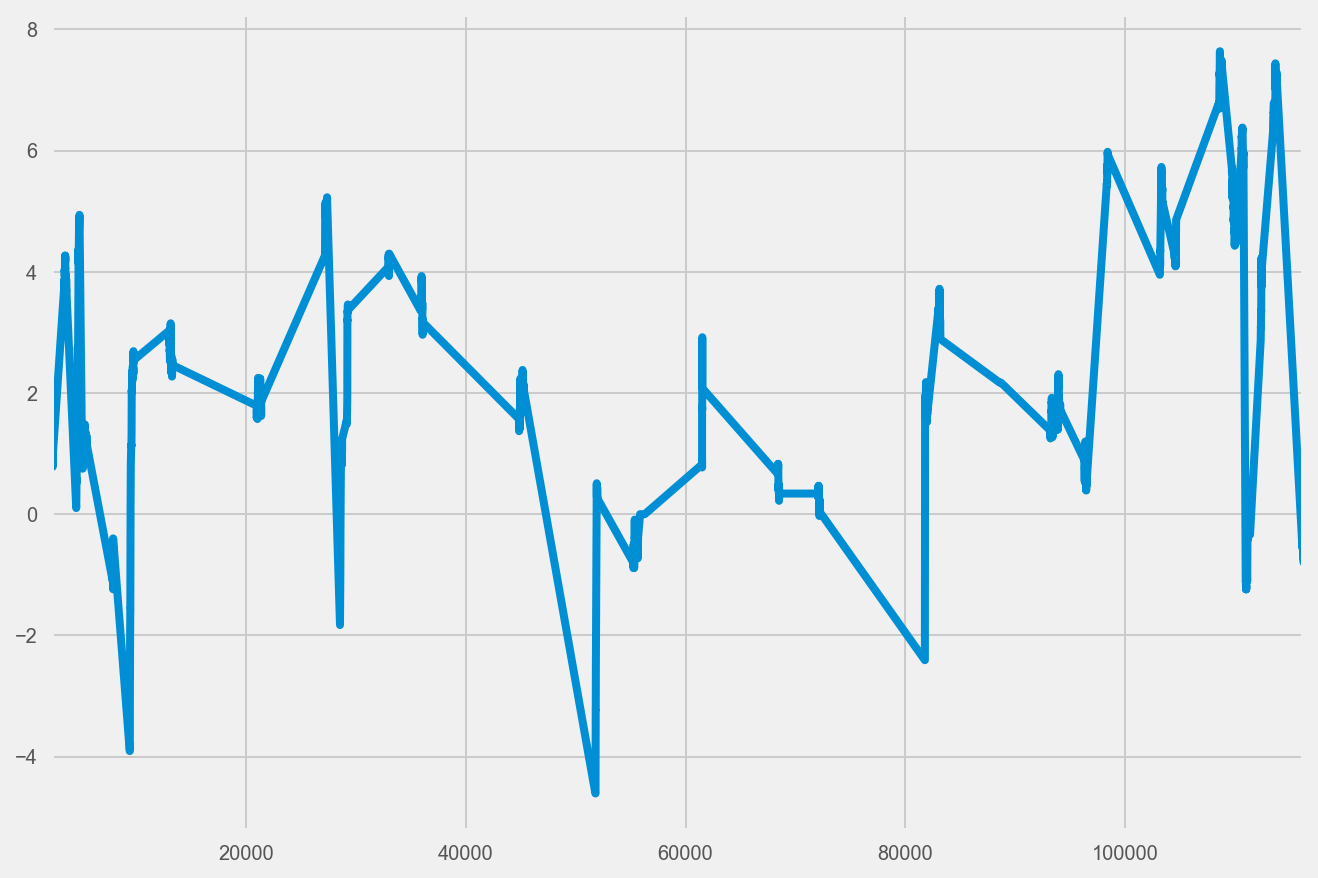

In [73]:
#Shows the changes in exchange rate for interest rate shocks in developed and developing countries
df["lerate"].plot()
plt.show()



In [74]:
from scipy.stats.stats import pearsonr

In [79]:
import numpy as np

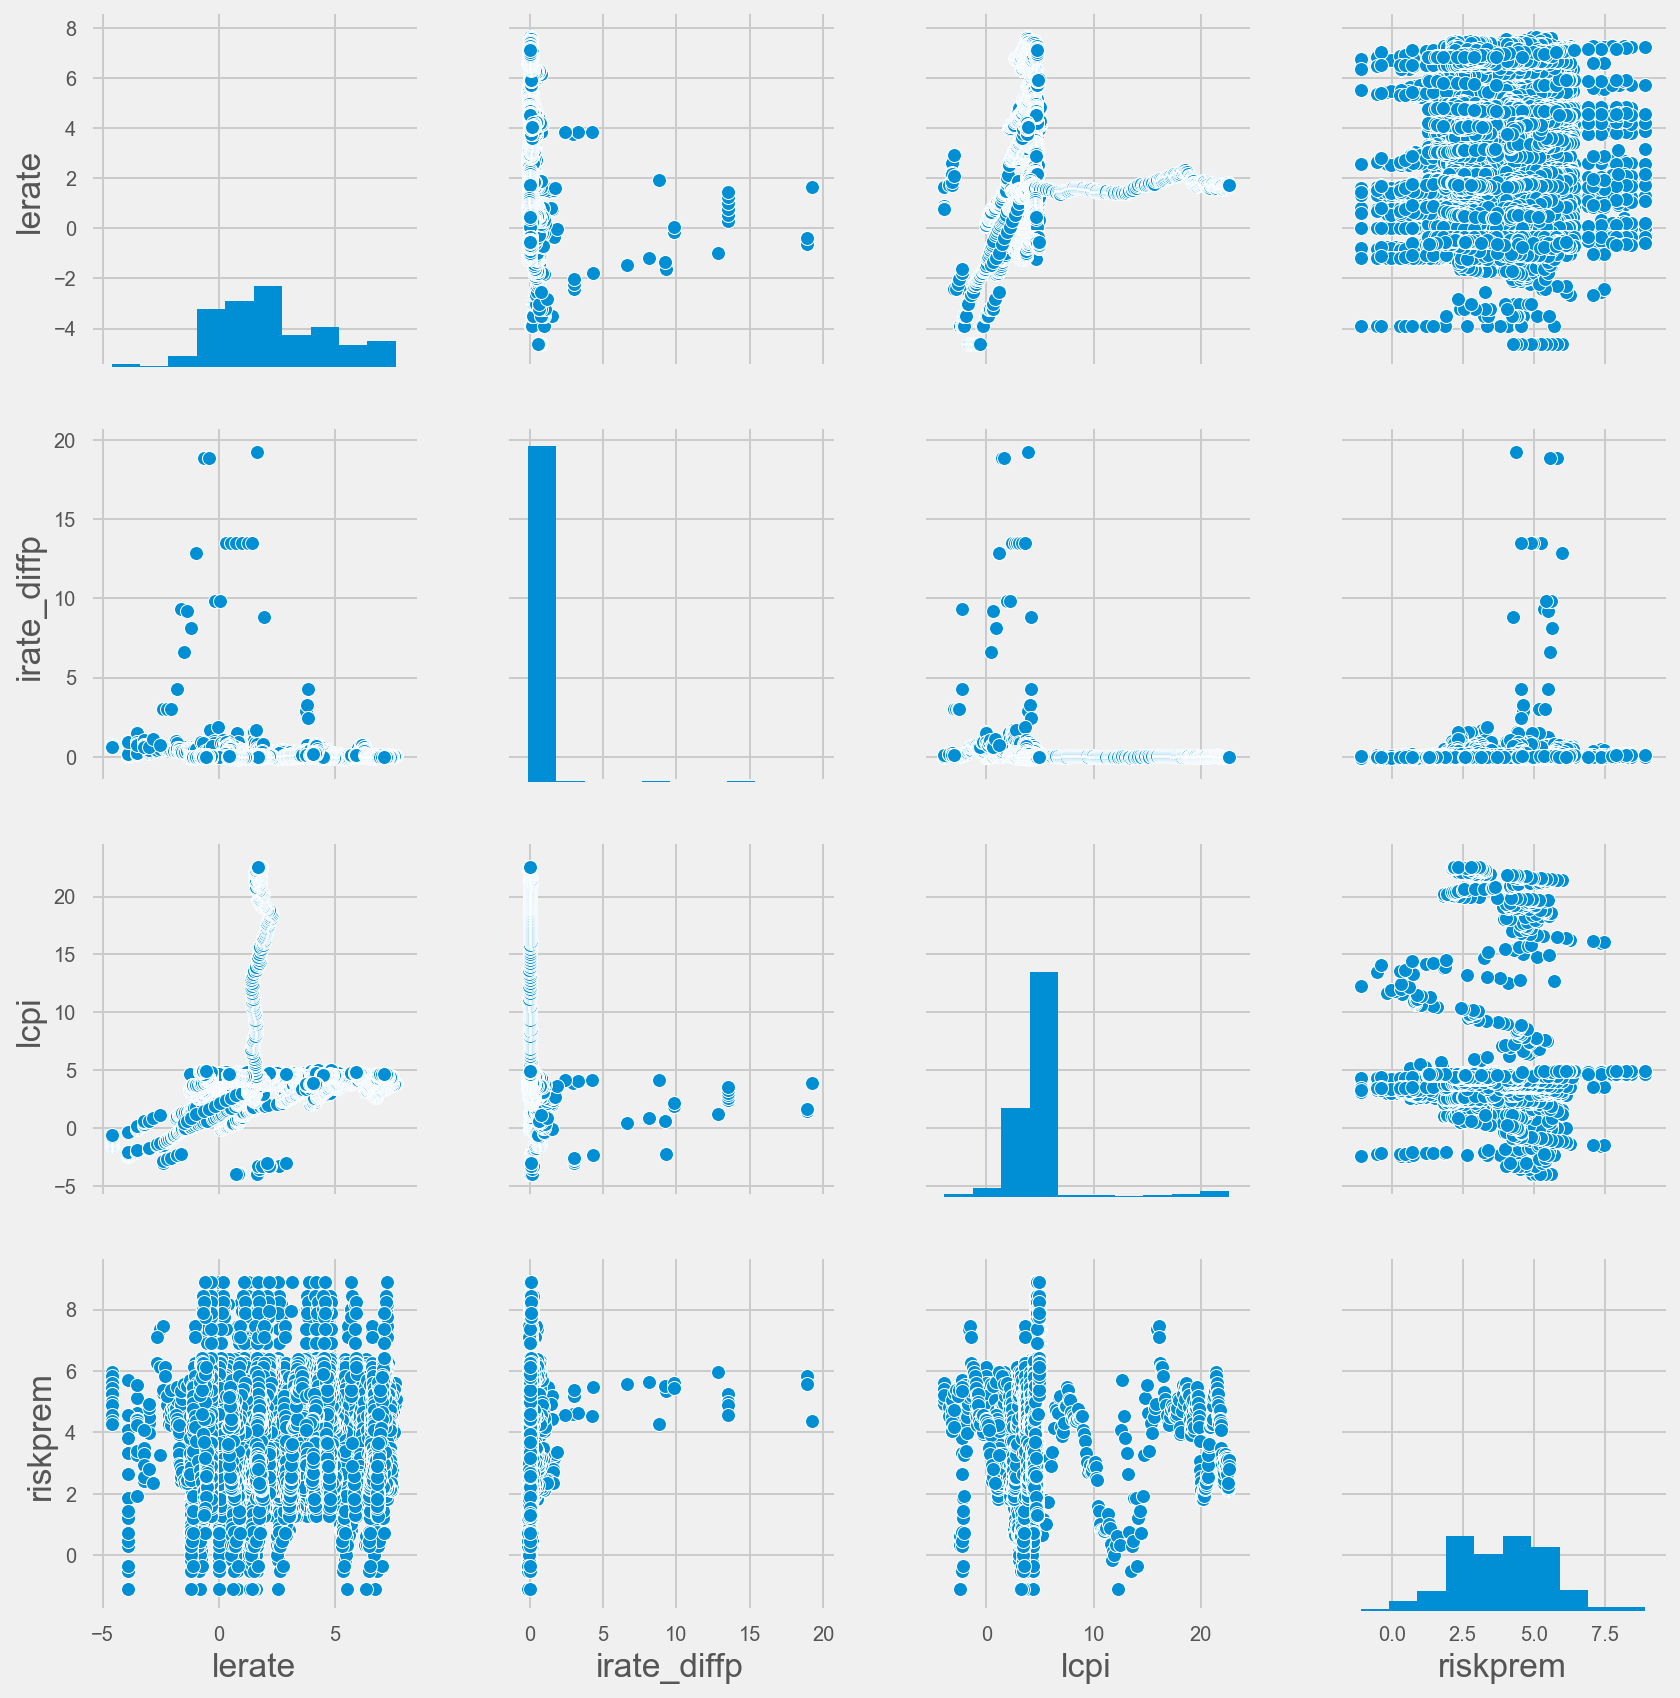

In [76]:
#Pairplot of the different variables in dataset
sns.pairplot(data=df, 
             vars=['lerate', 'irate_diffp','lcpi','riskprem',], size=3)
plt.tight_layout()
# plt.savefig('./figures/scatter_by_gender.png', dpi=300) ## undo this line if you want to save the graph
plt.show()
#'lcpi', 'linkprod', 'riskprem', 'irate_diffp'

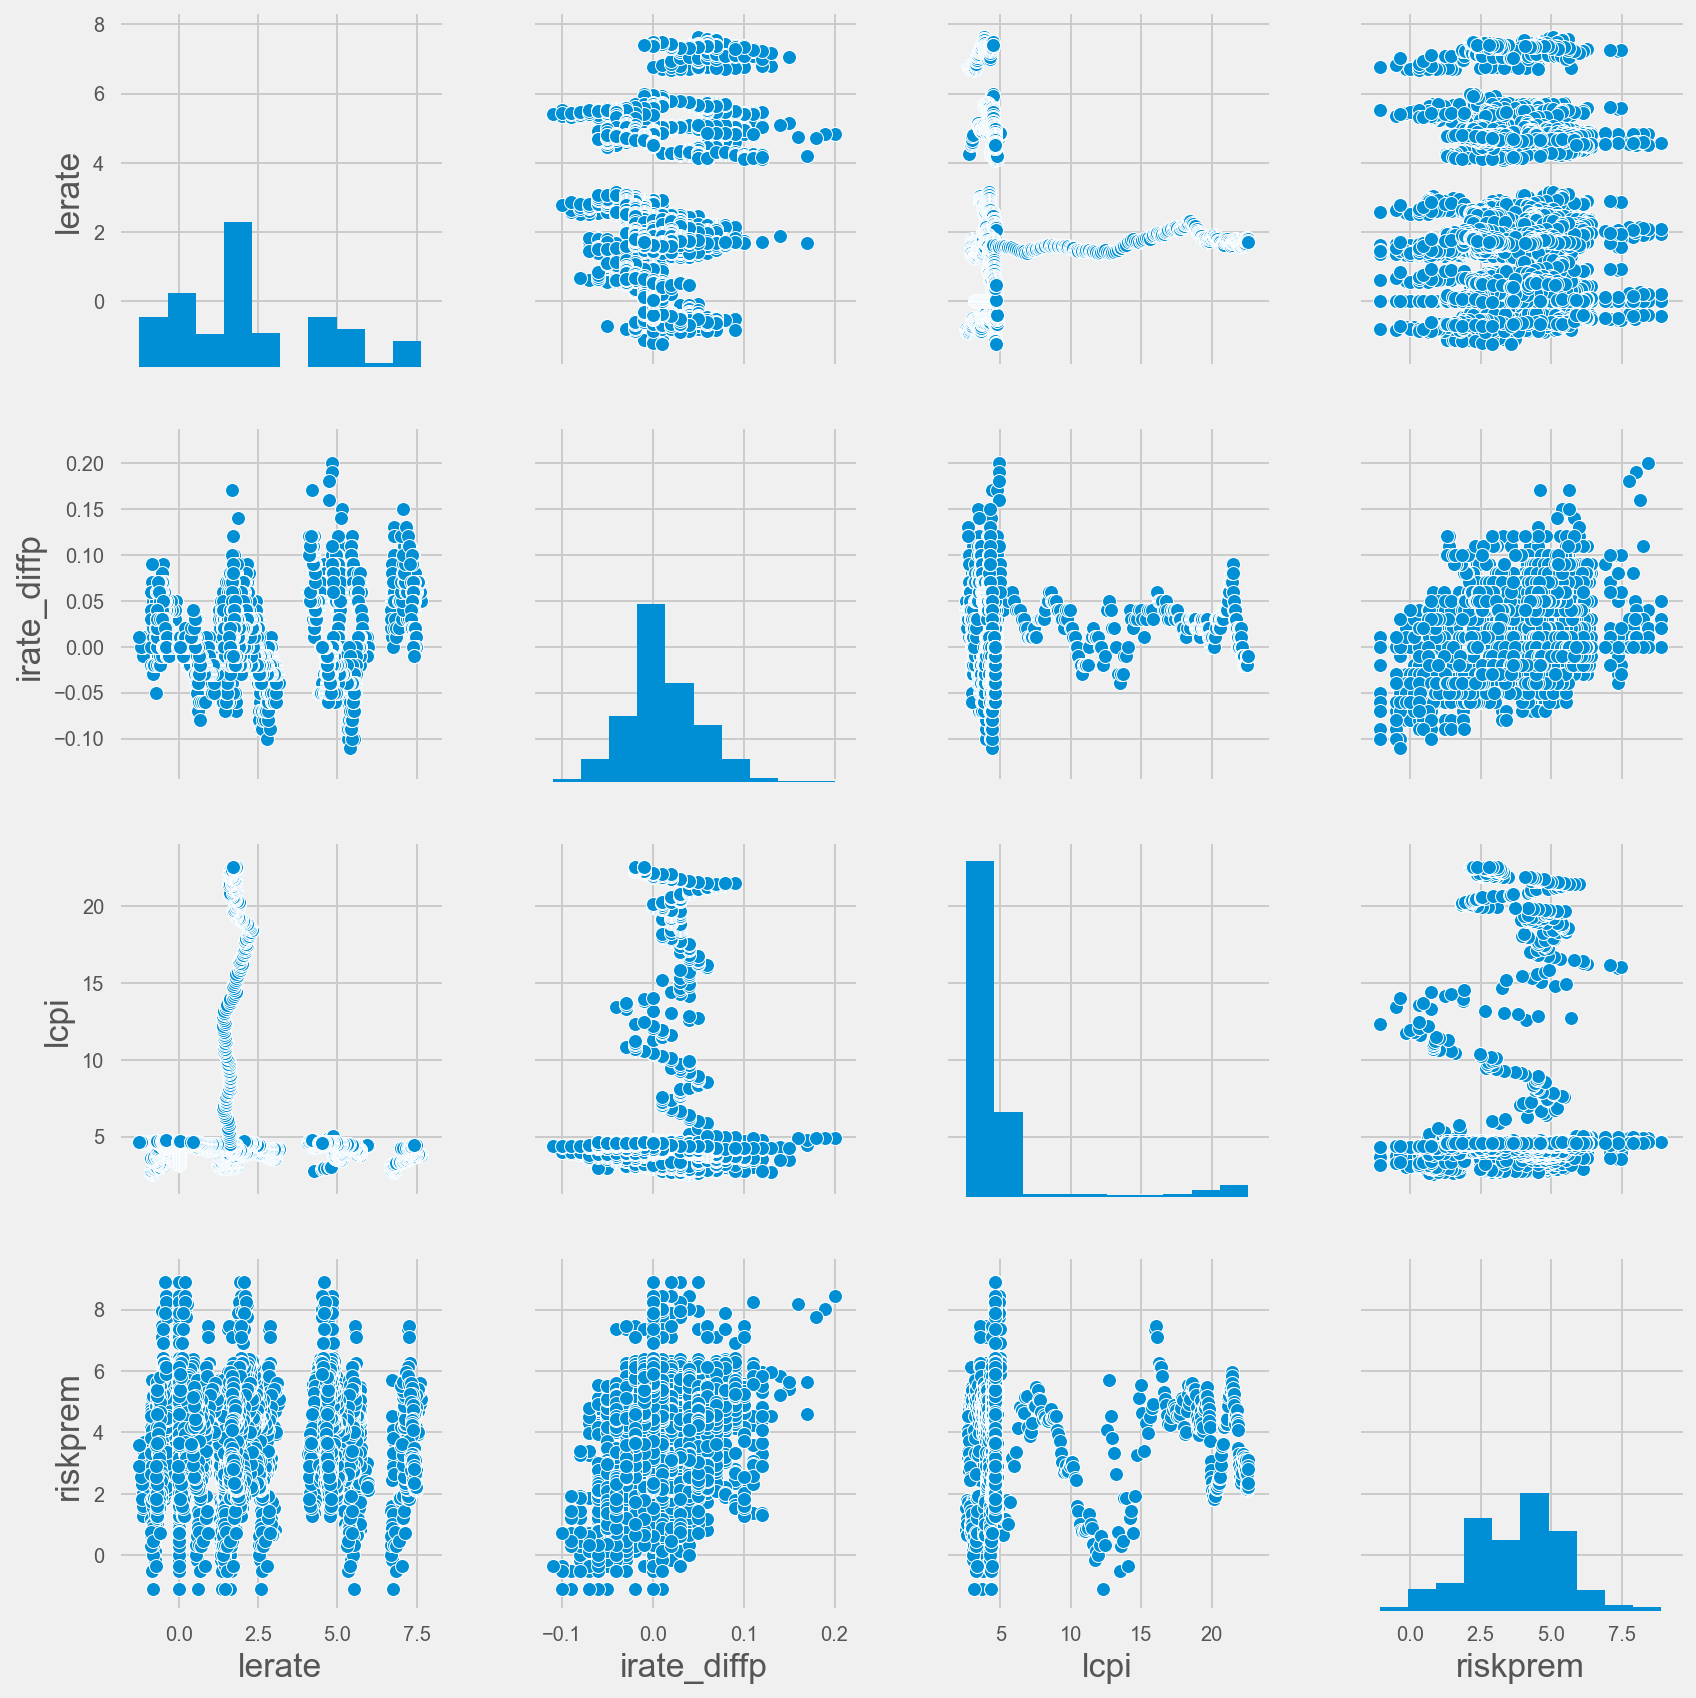

In [77]:
#Pairplot of developed countries in dataset
sns.pairplot(data=df[developed], 
             vars=['lerate', 'irate_diffp','lcpi','riskprem' ], size=3)
plt.tight_layout()
# plt.savefig('./figures/scatter_by_gender.png', dpi=300) ## undo this line if you want to save the graph
plt.show()
#'lcpi', 'linkprod', 'riskprem'

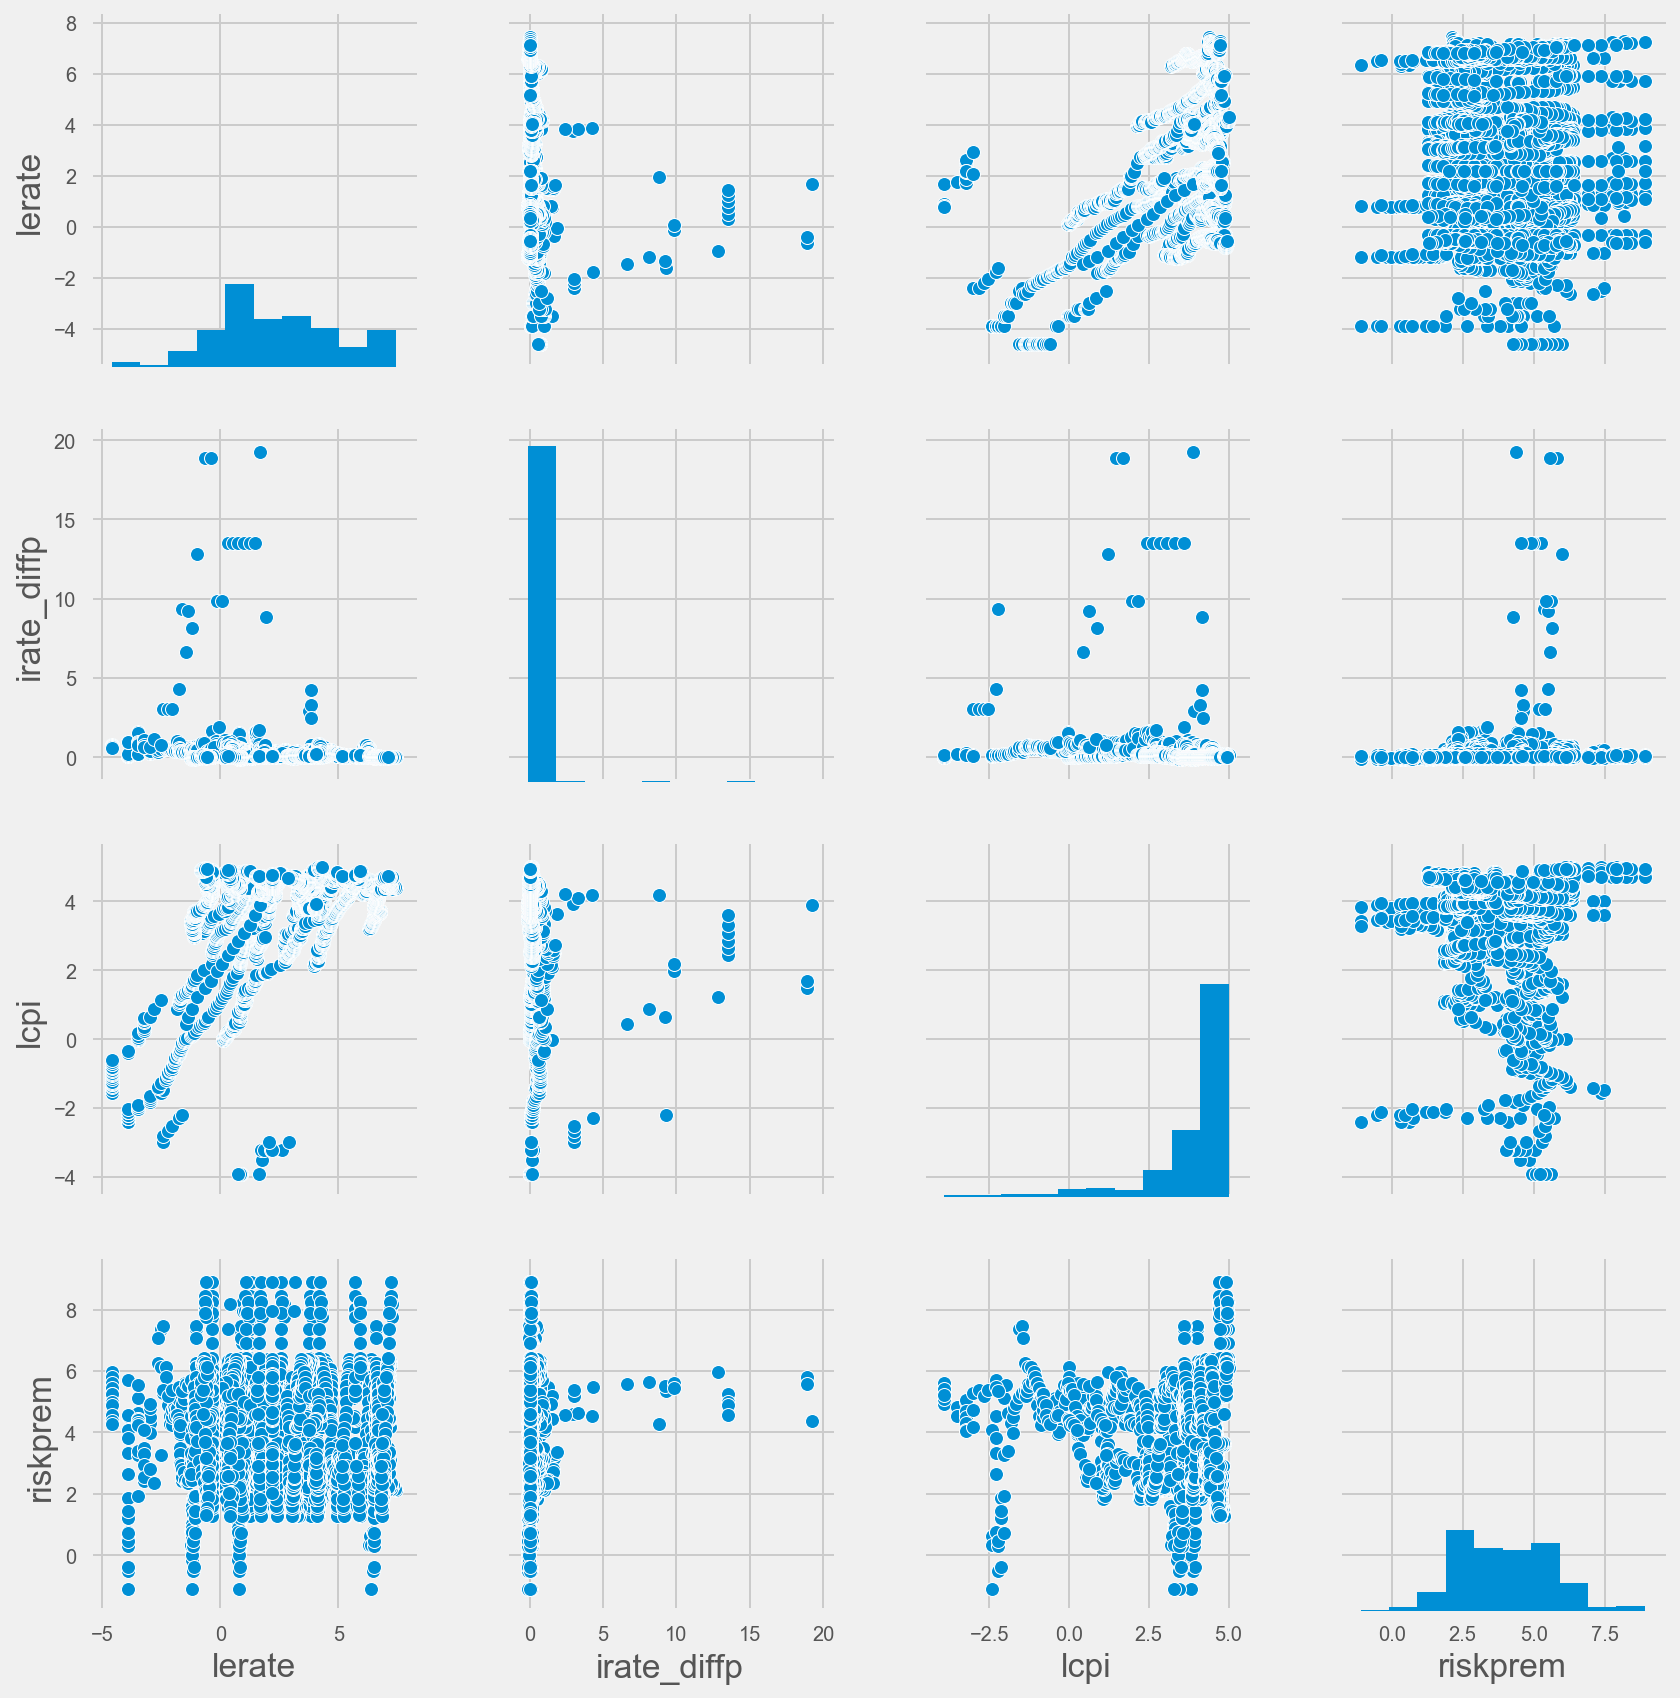

In [78]:
#Pairplot of developing countries in dataset
sns.pairplot(data=df[developing], 
             vars=['lerate', 'irate_diffp','lcpi','riskprem'], size=3)
plt.tight_layout()
# plt.savefig('./figures/scatter_by_gender.png', dpi=300) ## undo this line if you want to save the graph
plt.show()
#'lcpi', 'linkprod', 'riskprem'

5 Interesting things:
1) The exchange rate moves differently for interest rates shocks. For the developed countries the exchange rate appreciates for the developed countries it depreciates.
2) The dataset did not provide further indicators of monetary transmission mechanism to decipher the mystery
3) The original research had too few variables to conclude the complex mechanism of exchange rates i.e. budget deficits etc
4) The dataset does not mention the liquidity and fiscal constraints in the economy which directly impacts exchange rates
5) More exhaustive sample should be used in order to come up with concrete conclusions.

